In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("/content/Genome_Final.xlsx")

In [4]:
# Generating an initial summary of the dataset

# Number of rows and columns
num_rows, num_cols = df.shape

# Column data types
data_types = df.dtypes

# Summary statistics for numerical features
numerical_summary = df.describe()

# Summary of categorical features
categorical_features = df.select_dtypes(include=['object']).nunique()

# Displaying results
summary = {
    "Number of Rows": num_rows,
    "Number of Columns": num_cols,
    "Numerical Features Summary": numerical_summary,
    "Categorical Features Unique Values": categorical_features,
    "Data Types": data_types
}

summary

{'Number of Rows': 9999,
 'Number of Columns': 39,
 'Numerical Features Summary':        chromosome      position  disease_status  Sequencing_Coverage  \
 count      9999.0  9.999000e+03     9999.000000          9999.000000   
 mean          1.0  2.331611e+07        0.329333            95.060256   
 std           0.0  1.380182e+07        0.469995             2.895873   
 min           1.0  7.344620e+05        0.000000            90.001194   
 25%           1.0  1.171154e+07        0.000000            92.579138   
 50%           1.0  2.188969e+07        0.000000            95.078691   
 75%           1.0  3.504592e+07        1.000000            97.571177   
 max           1.0  4.866862e+07        1.000000            99.999680   
 
        Exercise_Duration  Cigarettes_Per_Day  Average_Sleep  
 count        9999.000000         9999.000000    9999.000000  
 mean           64.837384            5.069907       7.498750  
 std            31.806193            7.777565       2.288716  
 min    

## Data Preparation and Cleaning

In [5]:
# Checking for missing values before cleaning
missing_values_before = df.isnull().sum()

# Display columns with missing values, if any
missing_values_before[missing_values_before > 0]

Dietary_Restrictions    6996
Relative_Disease        2438
Health_Goals            1959
dtype: int64

In [7]:
# Identifying columns with more than 60% missing values
missing_threshold = 0.60  # 60%
missing_percentage = df.isnull().mean()

# Dropping columns with more than 60% missing values
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()
df.drop(columns=columns_to_drop, inplace=True)

# Imputing missing categorical values using mode (most frequent category)
categorical_missing = ['Relative_Disease', 'Health_Goals']

for col in categorical_missing:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Checking for remaining missing values after imputation
missing_values_final = df.isnull().sum()

# Display columns that still have missing values, if any
missing_values_final[missing_values_final > 0]

<ipython-input-7-af134da523c6>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Series([], dtype: int64)

In [6]:
# Checking for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()

# Display the number of duplicate rows found
duplicate_count

0

In [8]:
import numpy as np

### Step 1: Check for Inconsistent or Invalid Values ###

# Checking unique values in categorical columns for inconsistencies
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}

# Checking for invalid numerical values (negative values where not expected)
invalid_values = {}
for col in ['Exercise_Duration', 'Cigarettes_Per_Day', 'Average_Sleep', 'Sequencing_Coverage']:
    invalid_values[col] = df[df[col] < 0][col].count()

# Display inconsistent categorical values and invalid numerical values
unique_values, invalid_values

({'# rsid': array(['rs12564807', 'rs3131972', 'rs148828841', ..., 'rs823849',
         'rs639297', 'rs555238'], dtype=object),
  'genotype': array(['AA', 'AG', 'AC', 'GG', 'CT', 'CC', 'GT', 'CG', 'TT', 'AT', 'II',
         'DD'], dtype=object),
  'Sequencing_Type': array(['WGS', 'WES'], dtype=object),
  'GeneA_Expression': array(['low', 'high', 'medium'], dtype=object),
  'GeneB_Expression': array(['low', 'medium', 'high'], dtype=object),
  'GeneC_Expression': array(['high', 'medium', 'low'], dtype=object),
  'GeneD_Expression': array(['low', 'medium', 'high'], dtype=object),
  'GeneE_Expression': array(['high', 'low', 'medium'], dtype=object),
  'Medical_History': array(['Heart Surgery; Kidney Stones',
         'Hypertension; Diabetes; Chickenpox',
         'Hypertension; Diabetes; Broken Bone', 'Appendectomy',
         'Kidney Stones; Gallbladder removal; Hypertension',
         'Chickenpox; Broken Bone',
         'Kidney Stones; Hypertension; Broken Bone',
         'Chickenpox; Asth

In [11]:
# Creating a backup copy of the dataset before cleaning for comparison
df_before = df.copy()

# Step 1: Detecting Outliers using IQR Method
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers (values outside 1.5*IQR range)
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()

# Step 2: Checking Feature Correlation to Remove Redundant Features
correlation_matrix = df[numerical_features].corr()

# Step 3: Optimizing Data Types (Converting Object to Category where applicable)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Step 4: Checking Memory Usage Before & After Optimization
memory_usage_before = df_before.memory_usage(deep=True).sum() / (1024**2)  # Convert bytes to MB
memory_usage_after = df.memory_usage(deep=True).sum() / (1024**2)  # Convert bytes to MB

# Display Results
data_cleaning_results = {
    "Outliers Detected": outliers,
    "Correlation Matrix": correlation_matrix,
    "Memory Usage Before (MB)": memory_usage_before,
    "Memory Usage After (MB)": memory_usage_after
}

data_cleaning_results


{'Outliers Detected': Sequencing_Coverage    0
 position               0
 Cigarettes_Per_Day     0
 Average_Sleep          0
 Exercise_Duration      0
 dtype: int64,
 'Correlation Matrix':                      Sequencing_Coverage  position  Cigarettes_Per_Day  \
 Sequencing_Coverage             1.000000  0.006060            0.010458   
 position                        0.006060  1.000000            0.000633   
 Cigarettes_Per_Day              0.010458  0.000633            1.000000   
 Average_Sleep                   0.005162  0.003697            0.004177   
 Exercise_Duration               0.003070 -0.006342           -0.004647   
 
                      Average_Sleep  Exercise_Duration  
 Sequencing_Coverage       0.005162           0.003070  
 position                  0.003697          -0.006342  
 Cigarettes_Per_Day        0.004177          -0.004647  
 Average_Sleep             1.000000          -0.005863  
 Exercise_Duration        -0.005863           1.000000  ,
 'Memory Usage Be

In [15]:
# Dropping the 'rsid' column
df.drop(columns=['# rsid'], inplace=True, errors='ignore')

# Confirming column removal
"rsid" in df.columns

False

## Univariate Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

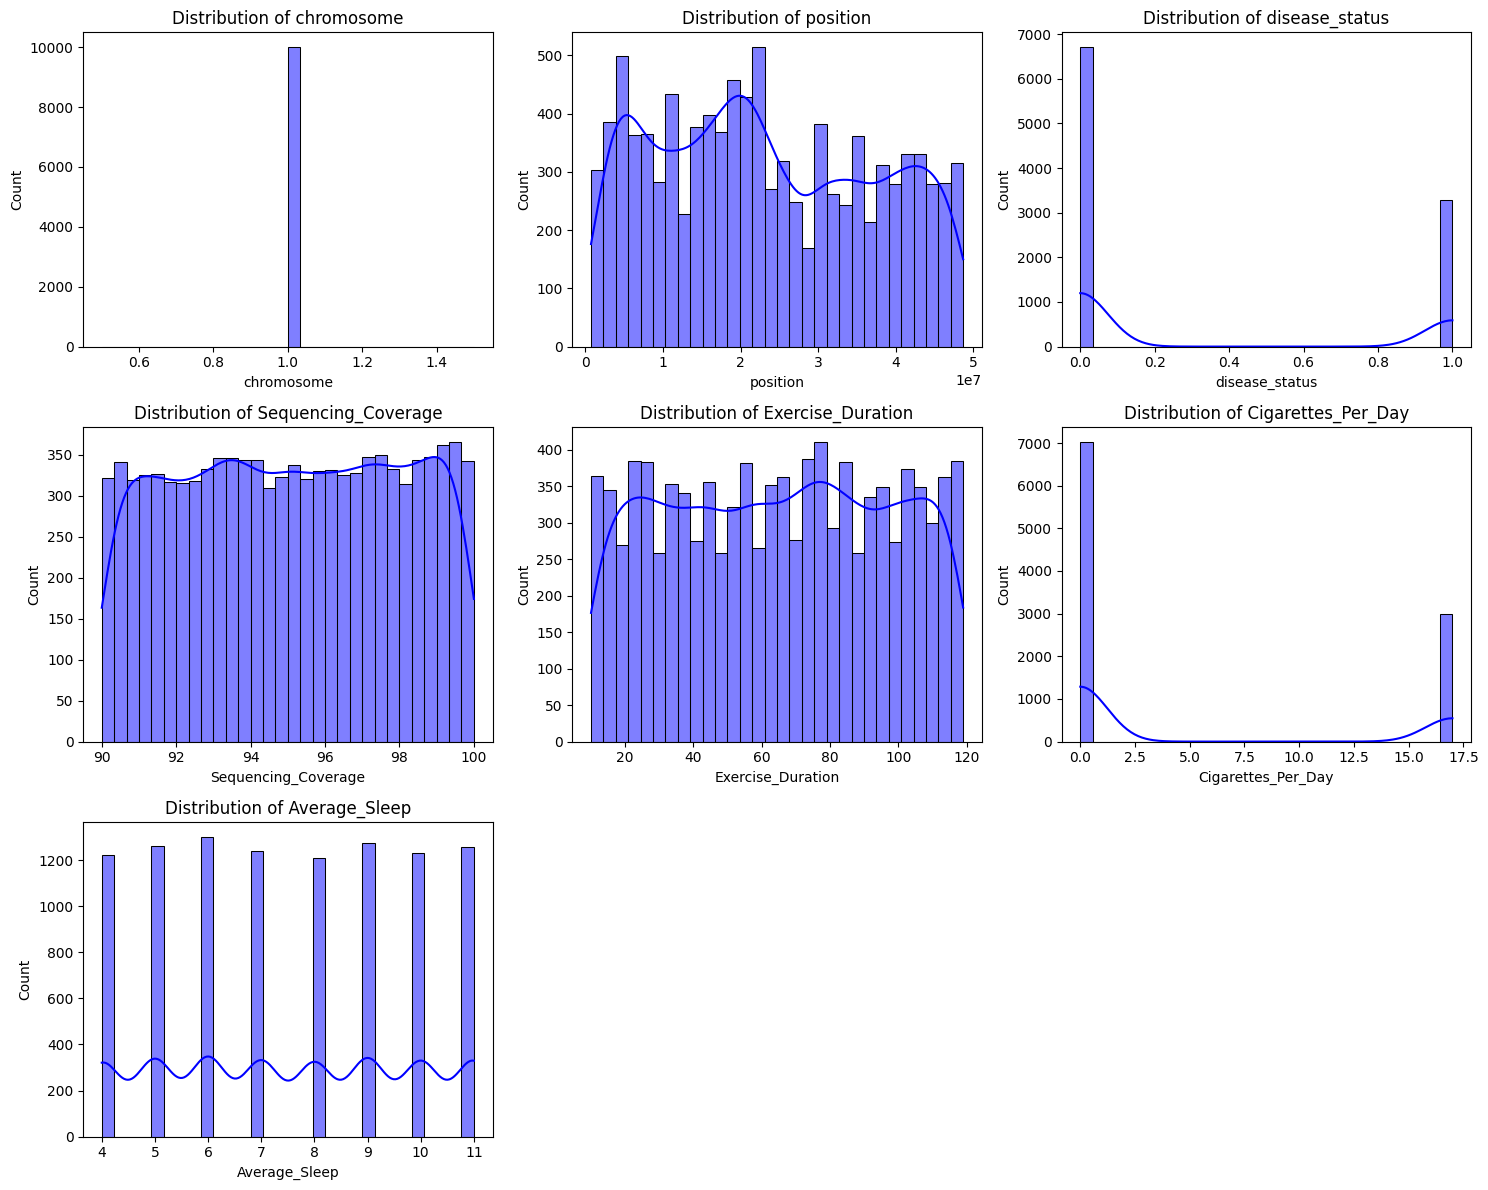

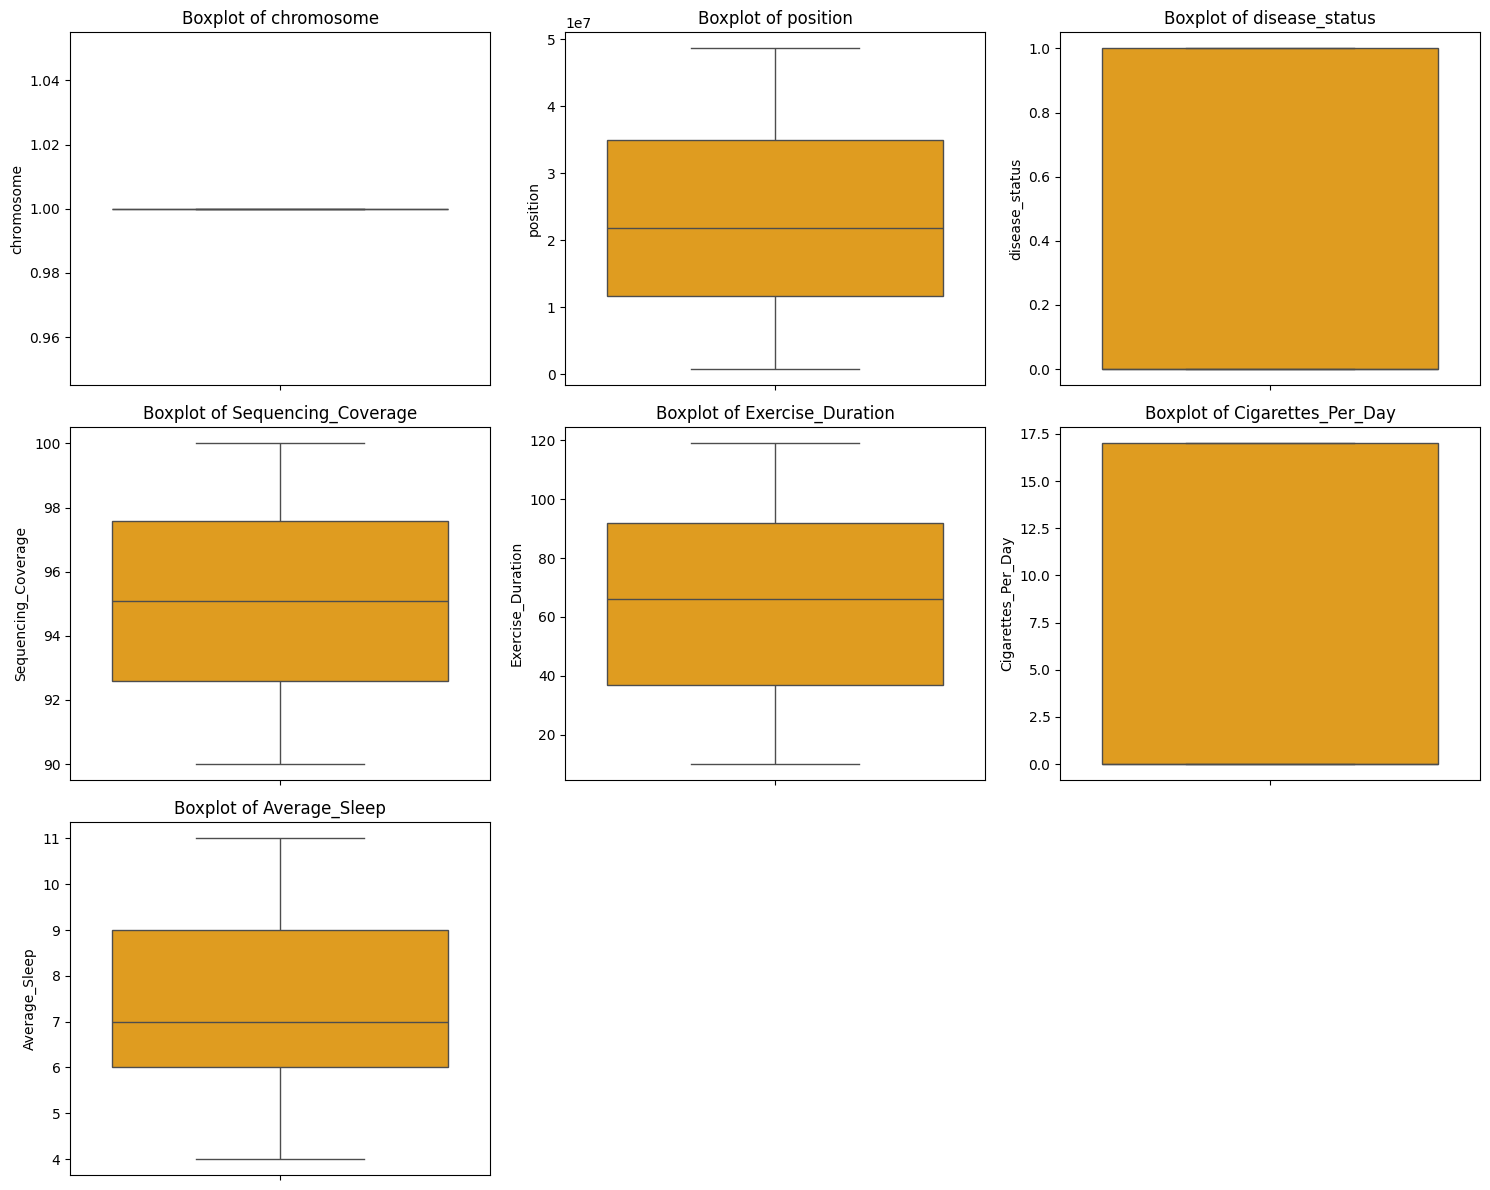

<ipython-input-16-4b8dfb012eb4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-16-4b8dfb012eb4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-16-4b8dfb012eb4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-16-4b8dfb012eb4>:37: FutureWarning: 

Passing `palette` without ass

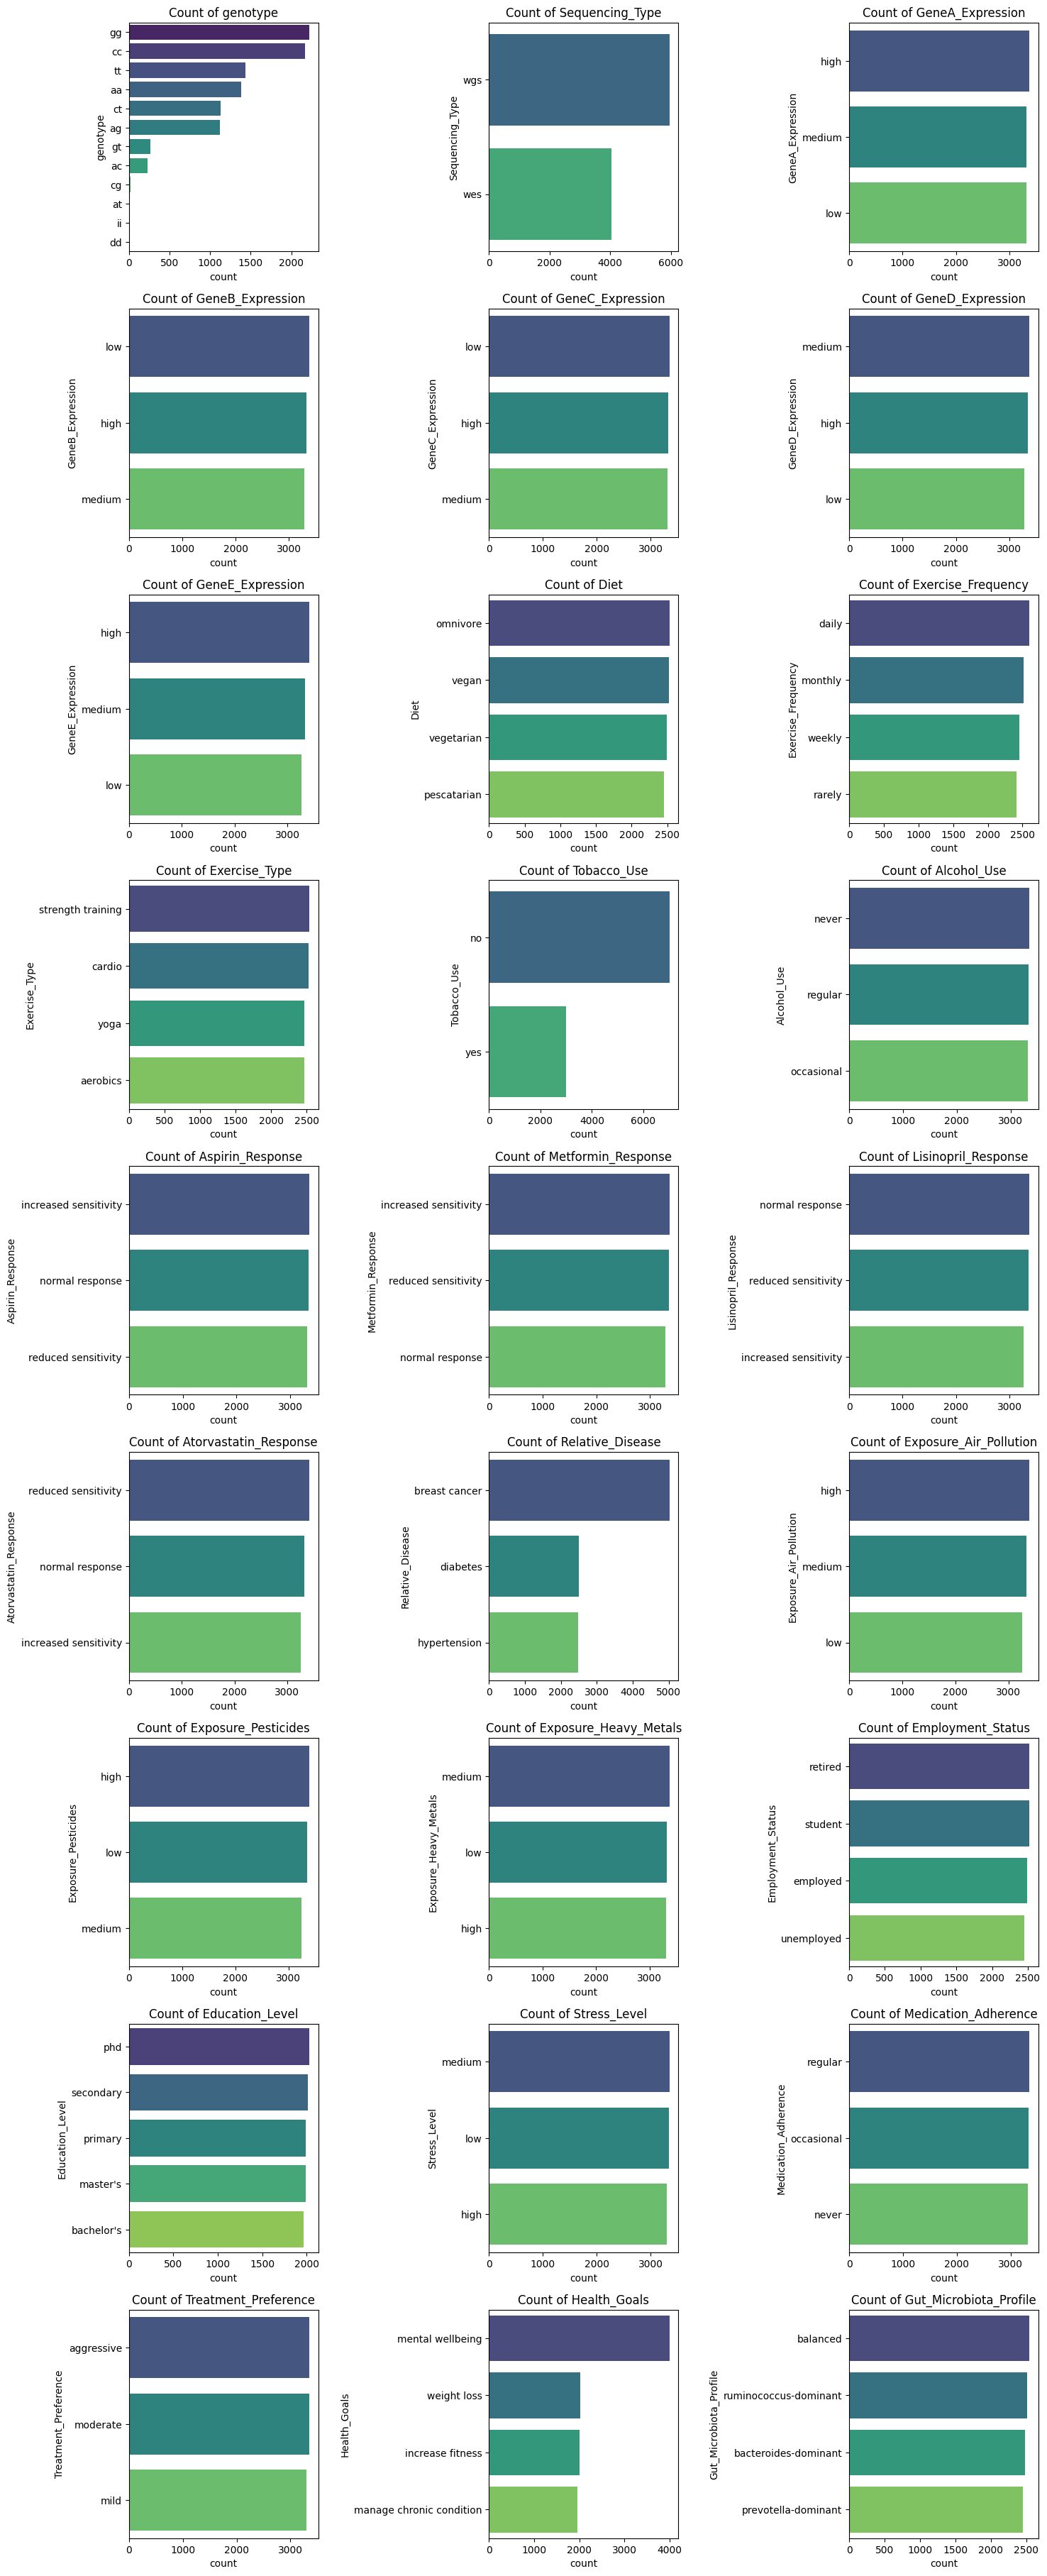

In [16]:
# Updating the code to exclude 'Medical_History', 'Current_Medications', 'Allergies' from categorical analysis

# Step 1: Histograms for Numerical Features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_rows = (len(num_cols) // 3) + 1  # Adjust rows dynamically
plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Step 2: Boxplots for Outlier Detection
plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[col], color="orange")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# Step 3: Bar Plots for Categorical Features (excluding 'Medical_History', 'Current_Medications', 'Allergies')
excluded_cols = ['Medical_History', 'Current_Medications', 'Allergies']
cat_cols = [col for col in df.select_dtypes(include=['category']).columns if col not in excluded_cols]

num_rows = (len(cat_cols) // 3) + 1  # Adjust rows dynamically
plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Count of {col}")

plt.tight_layout()
plt.show()


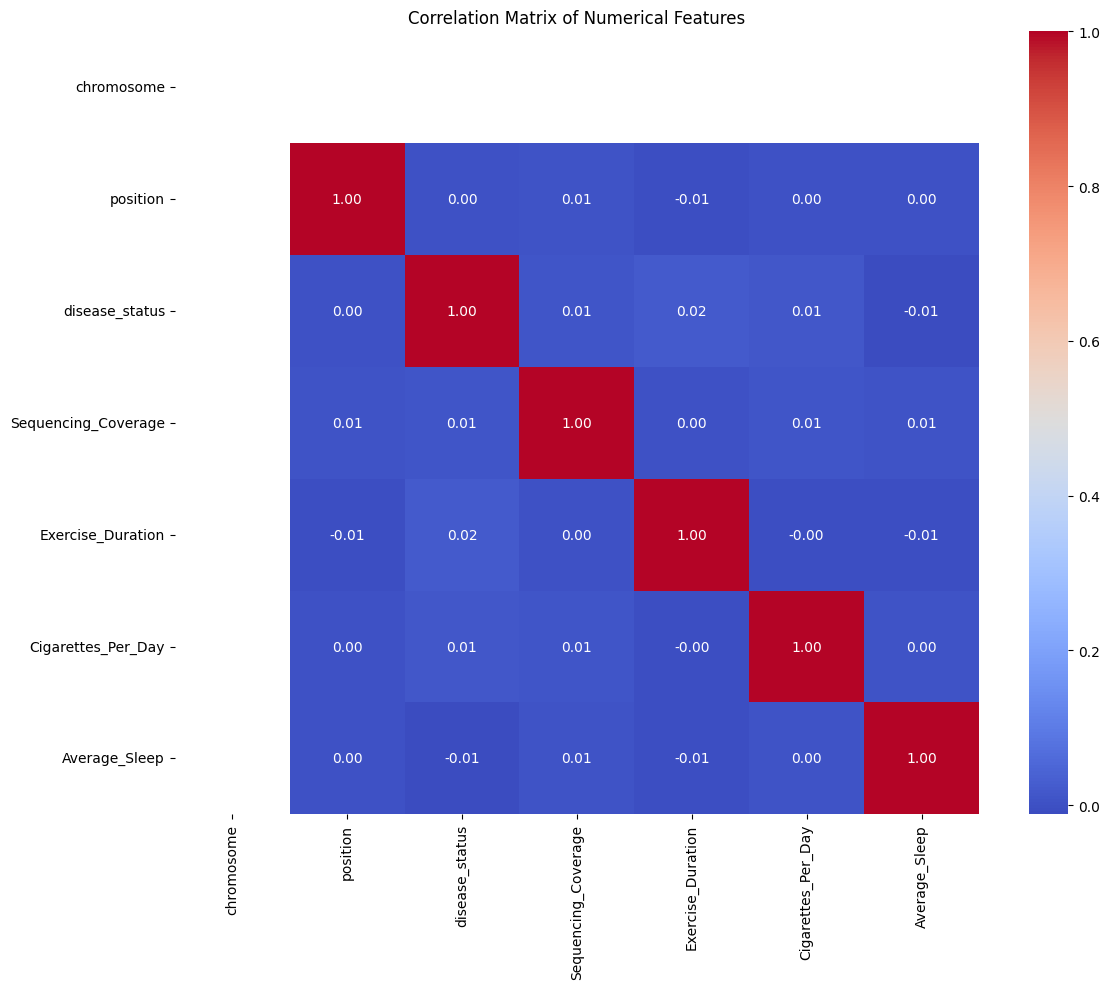

In [17]:
# --- 1. Heatmap of Correlation Matrix (Numerical Features) ---
plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

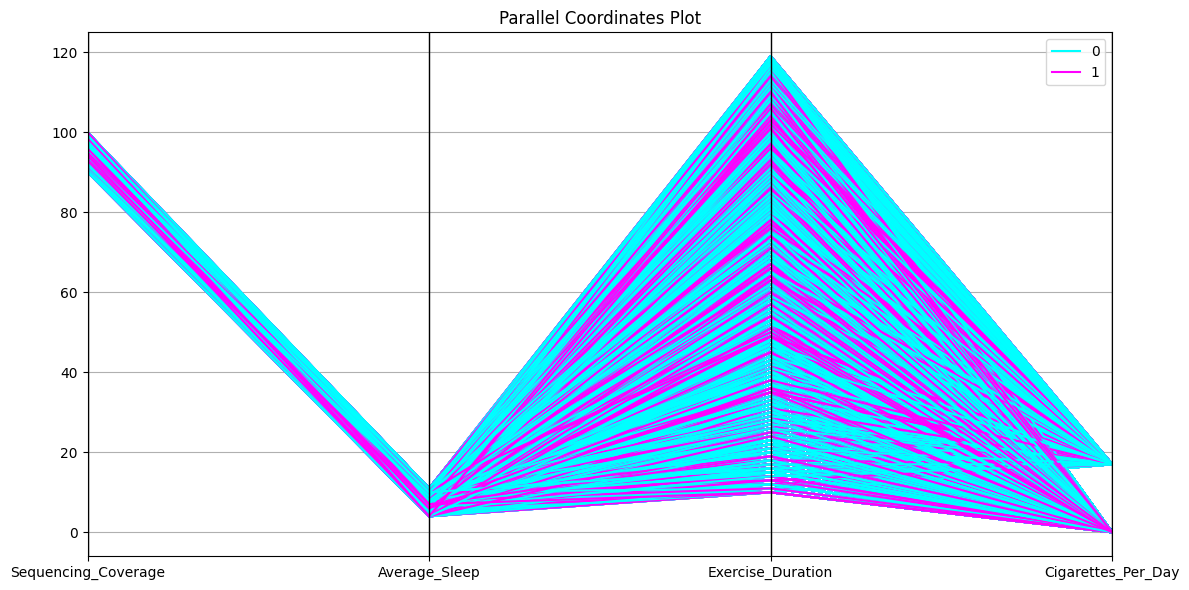

In [19]:
# --- 3. Parallel Coordinates Plot for Multivariate Analysis ---
# (Requires all features to be numeric or encoded; here we show an example using a subset)
from pandas.plotting import parallel_coordinates
# Select a subset of features (including disease_status if available)
subset_features = ['Sequencing_Coverage', 'Average_Sleep', 'Exercise_Duration', 'Cigarettes_Per_Day']
if 'disease_status' in df.columns:
    subset_features.append('disease_status')
plt.figure(figsize=(12, 6))
parallel_coordinates(df[subset_features], class_column='disease_status' if 'disease_status' in df.columns else None, colormap="cool")
plt.title("Parallel Coordinates Plot")
plt.tight_layout()
plt.show()

<ipython-input-20-9f4967be19f9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['disease_status'], y=df[col], data=df, palette="Set2")
<ipython-input-20-9f4967be19f9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['disease_status'], y=df[col], data=df, palette="Set2")
<ipython-input-20-9f4967be19f9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['disease_status'], y=df[col], data=df, palette="Set2")
<ipython-input-20-9f4967be19f9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

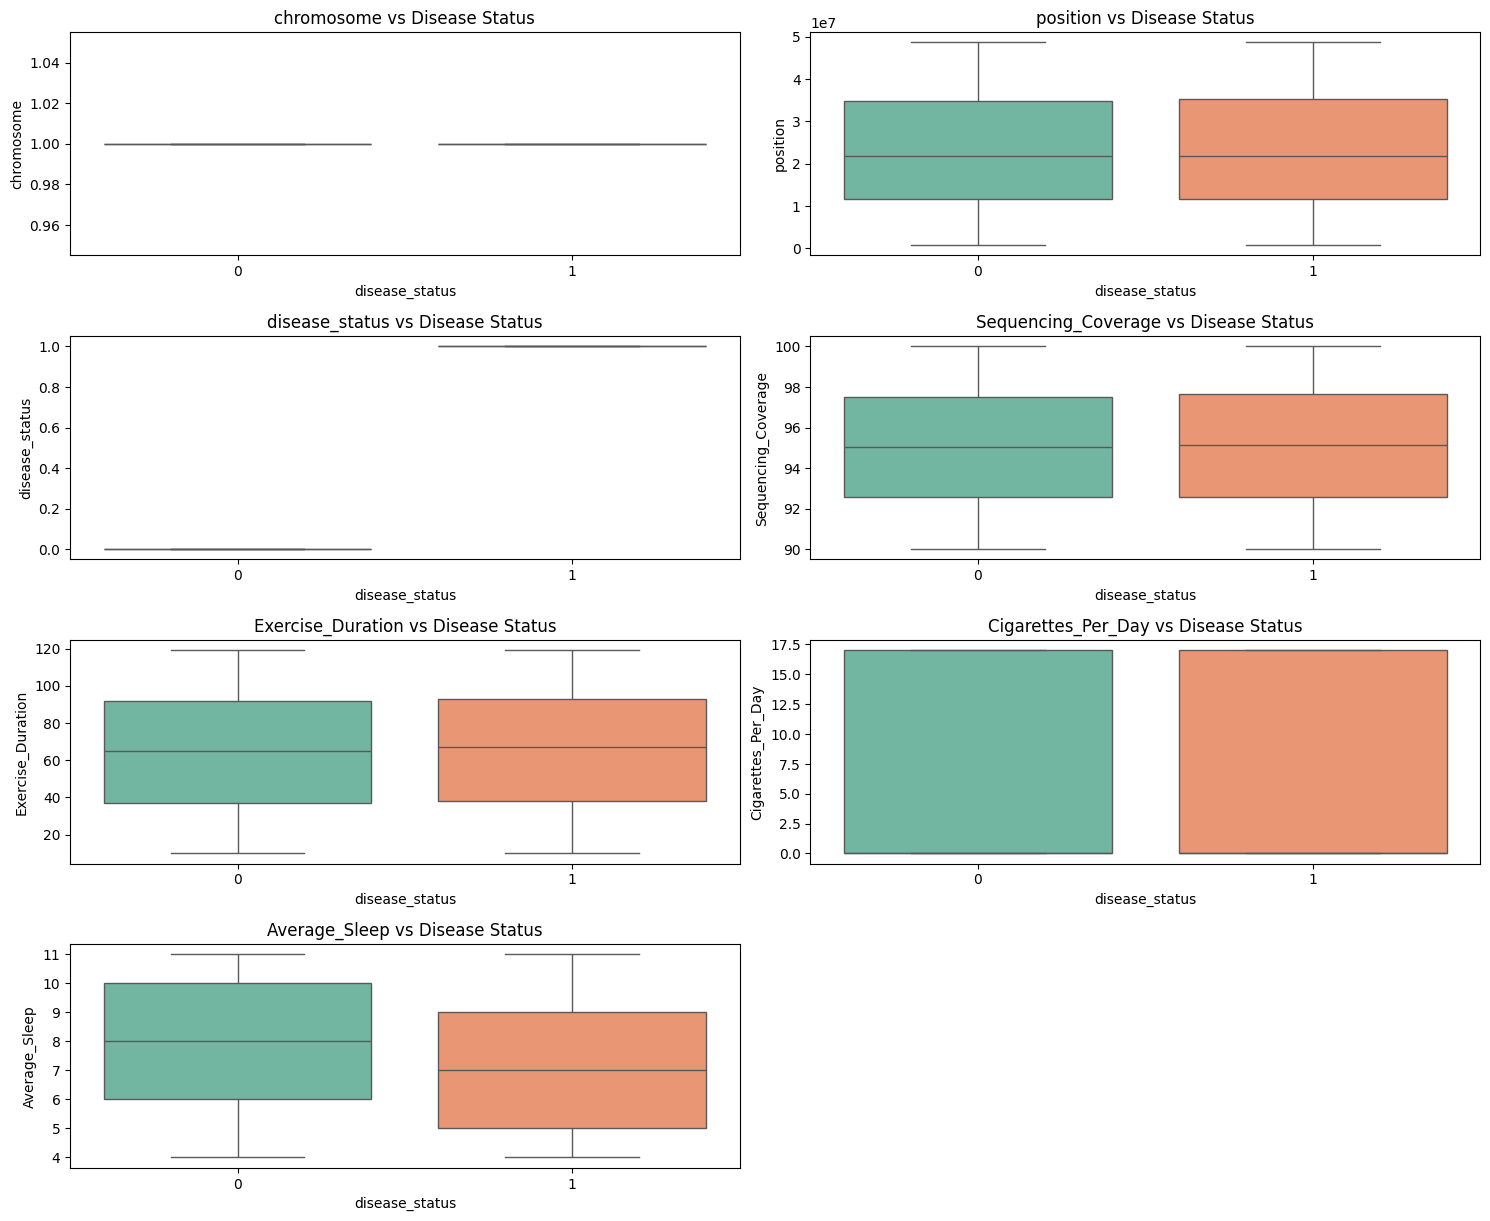

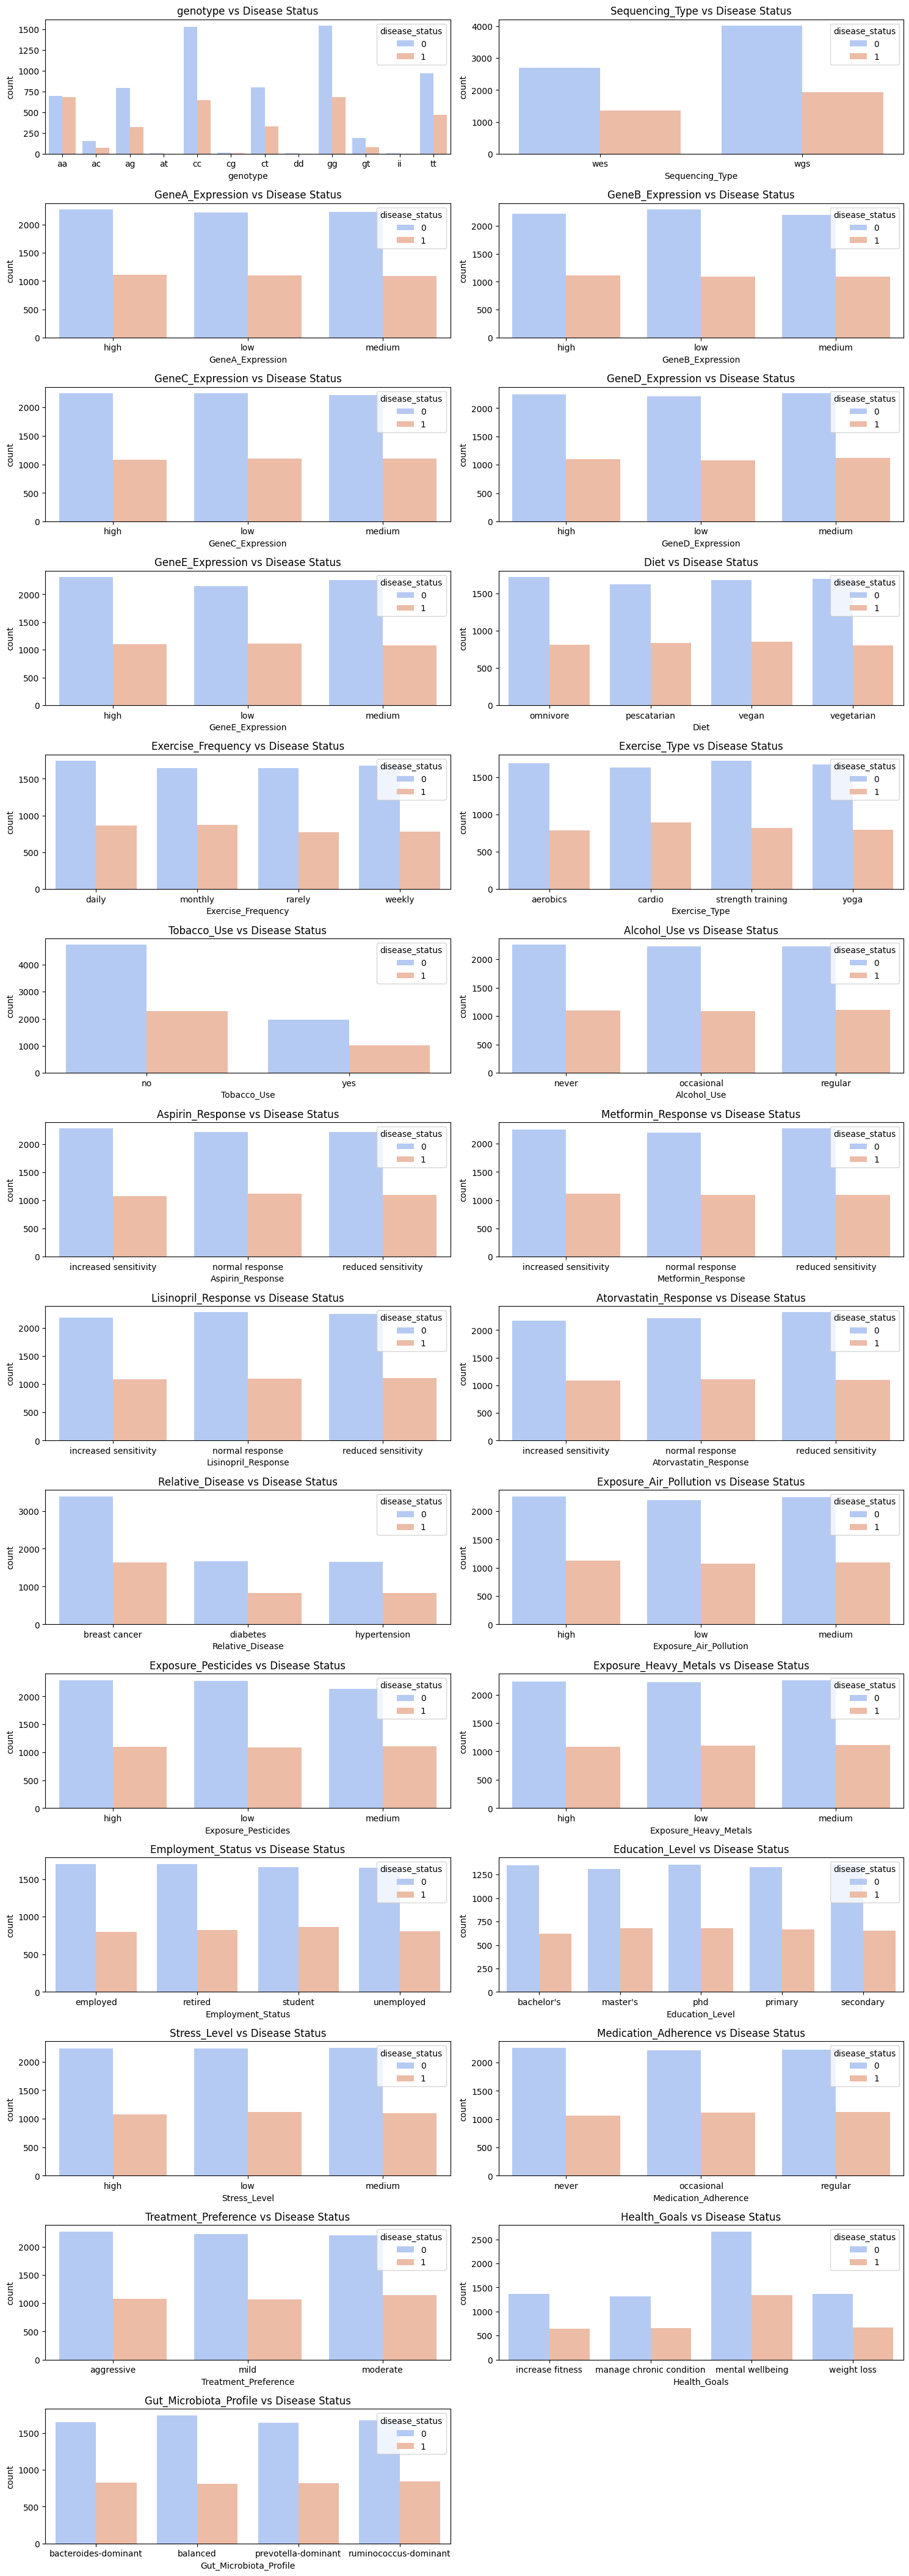

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-20-9f4967be19f9>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_matrix.index, y=corr_matrix.values, palette="coolwarm")


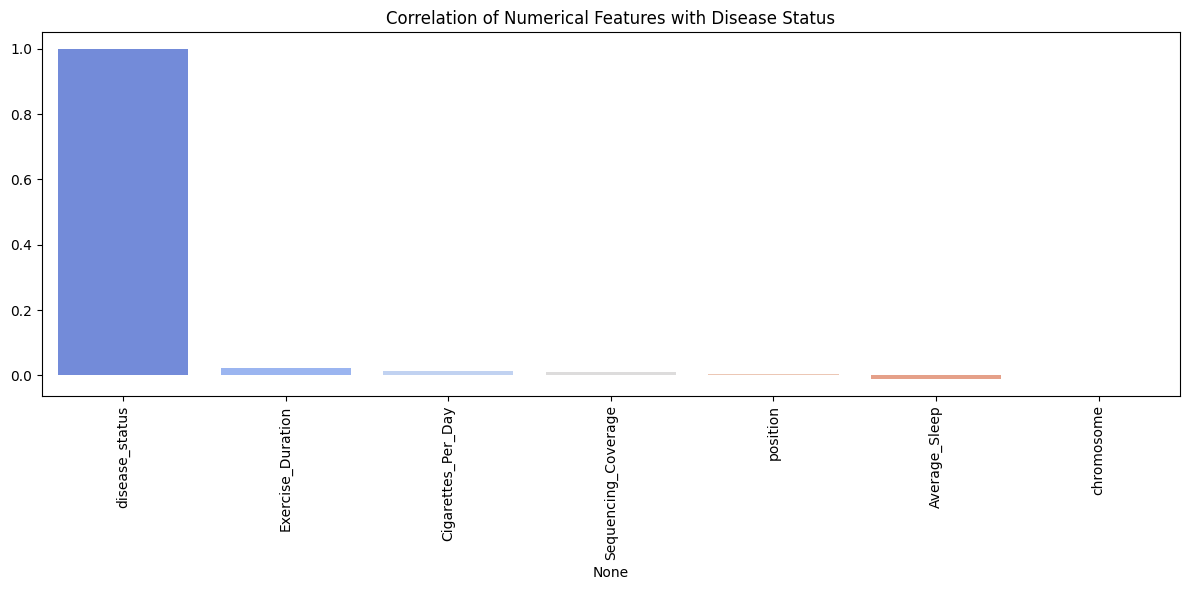

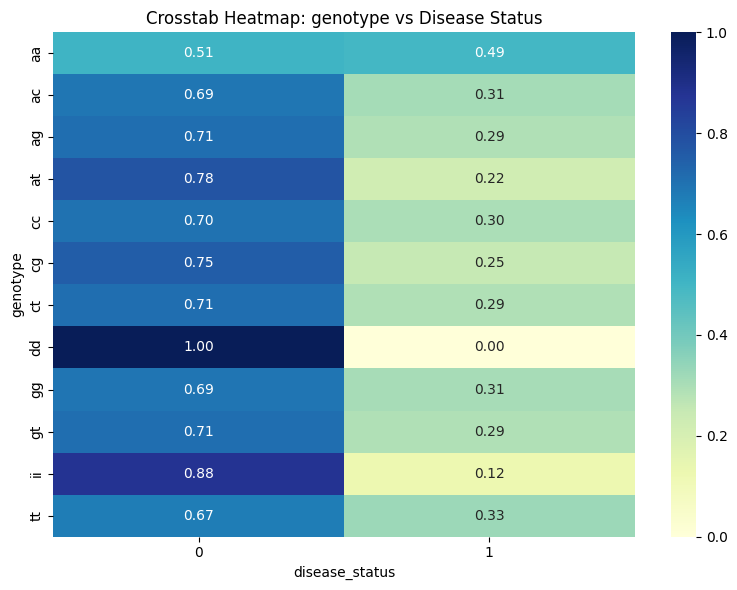

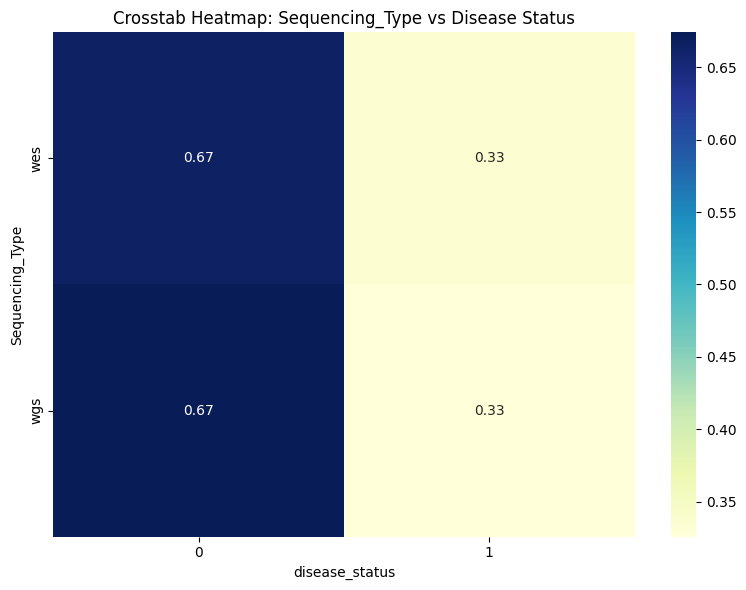

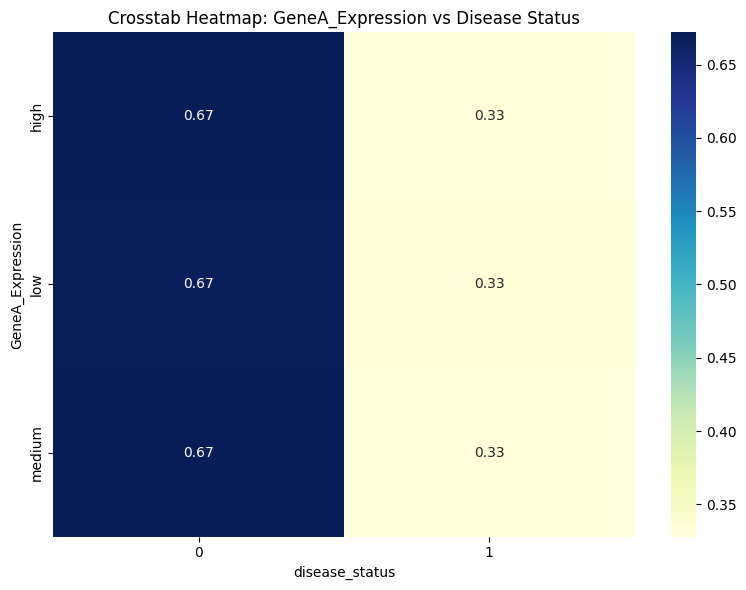

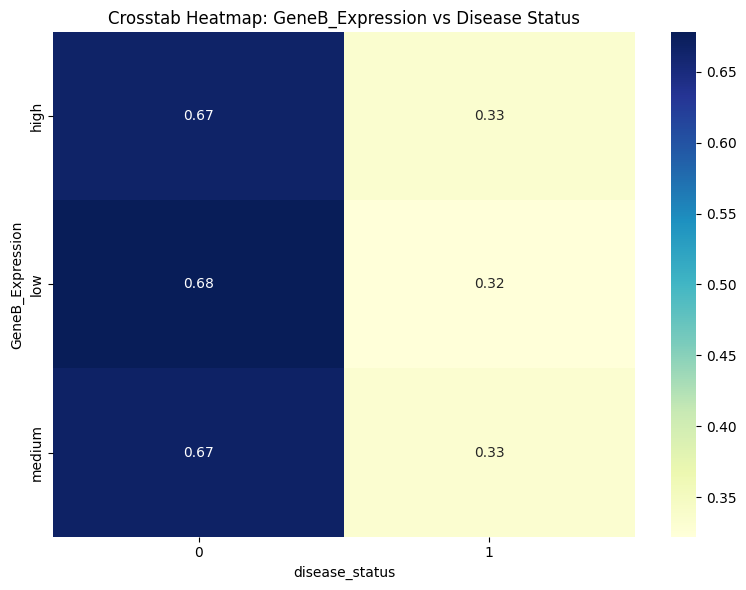

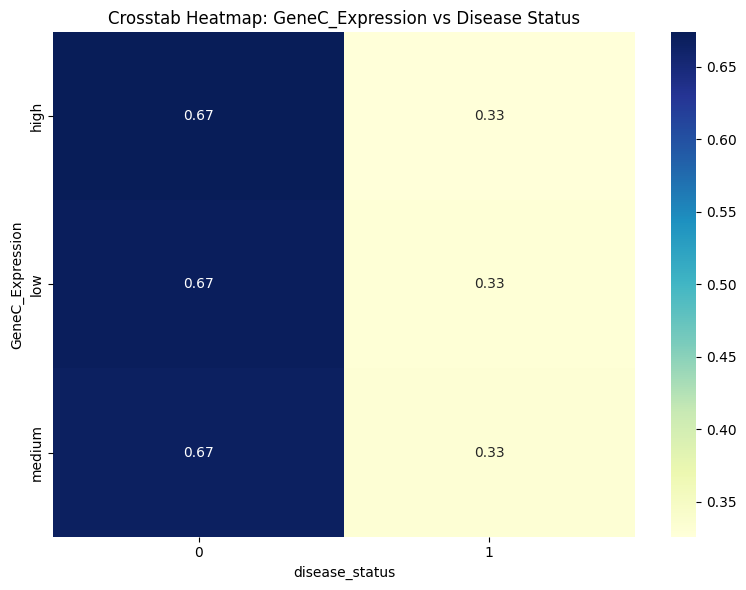

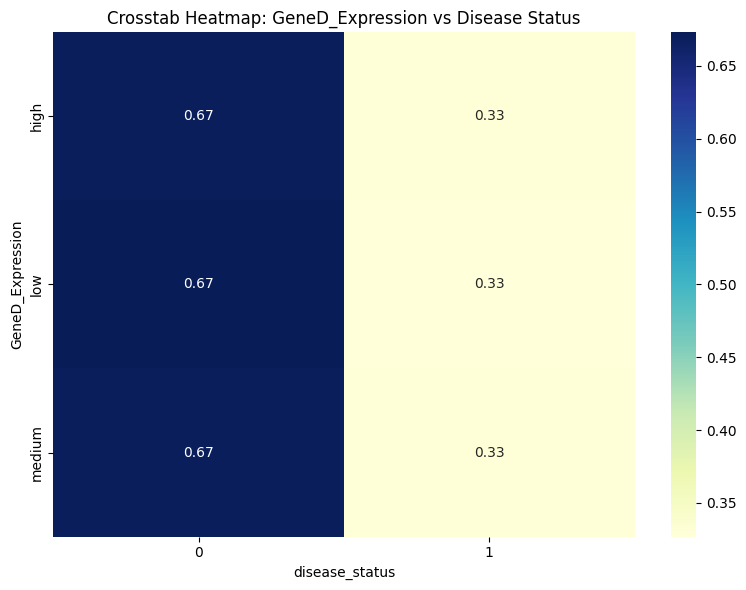

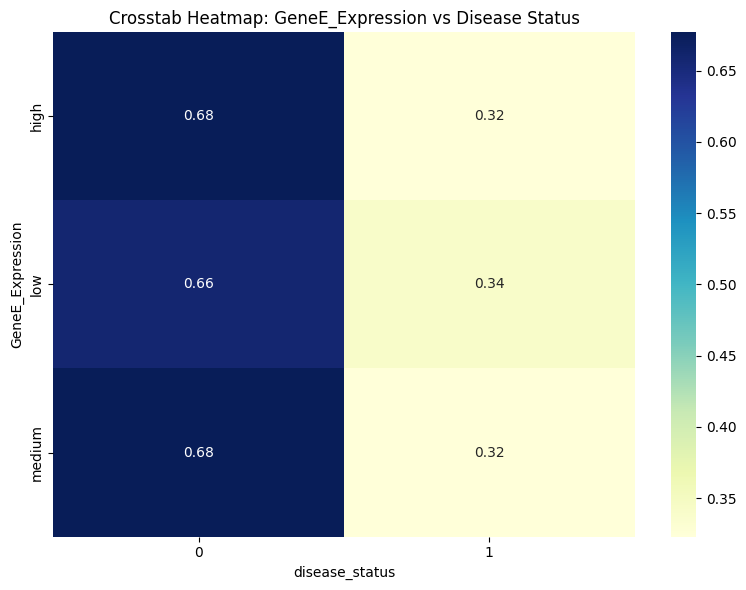

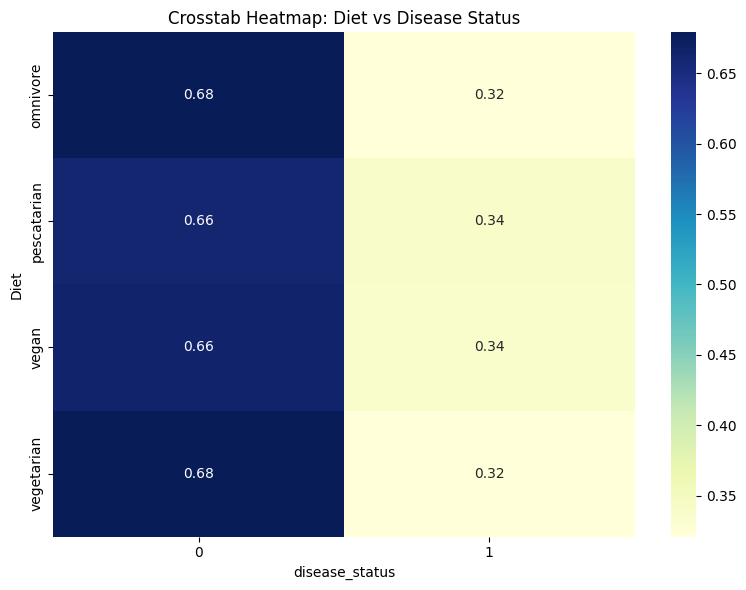

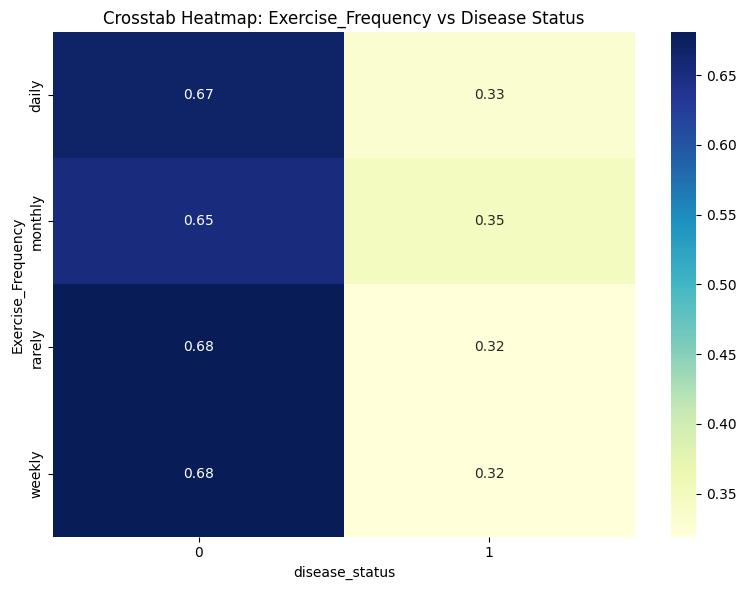

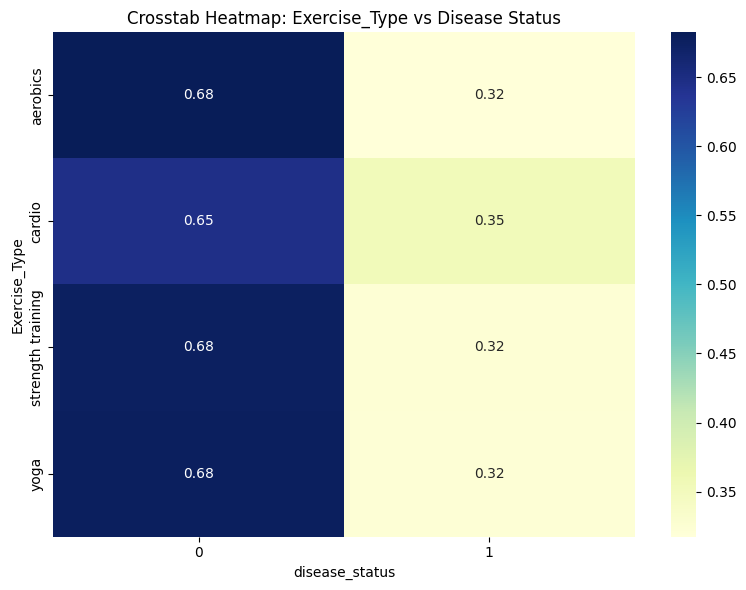

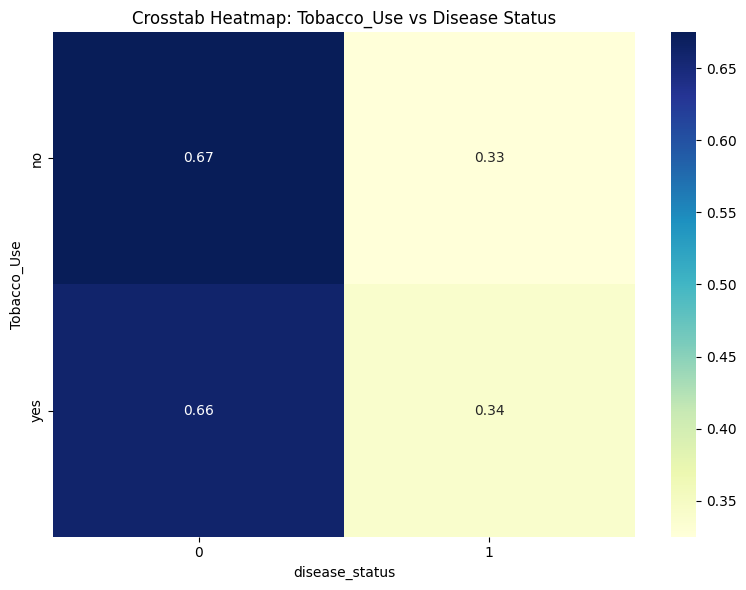

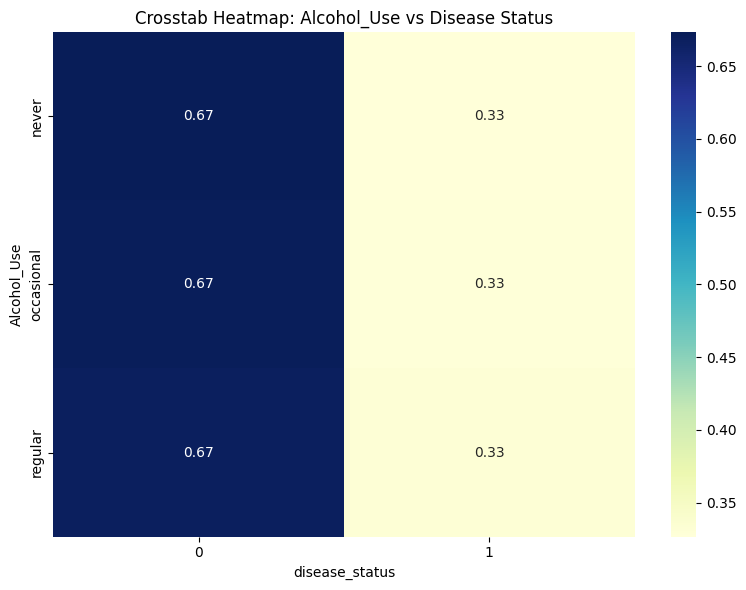

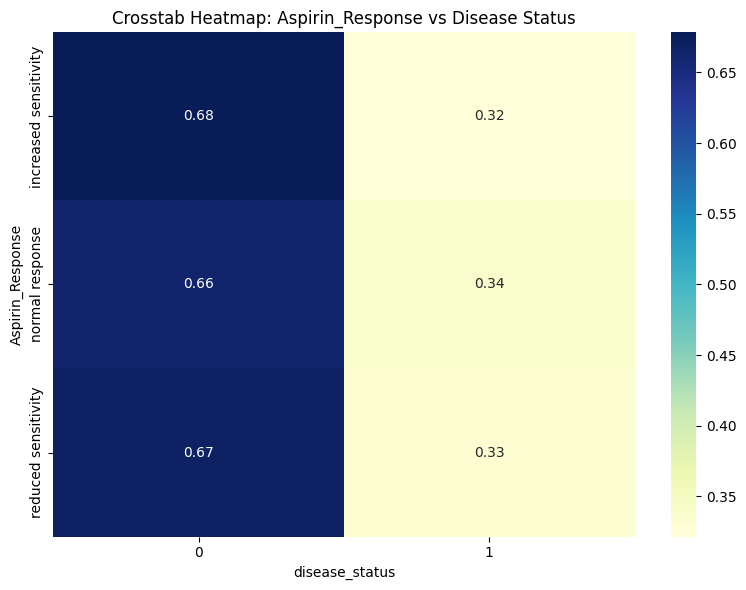

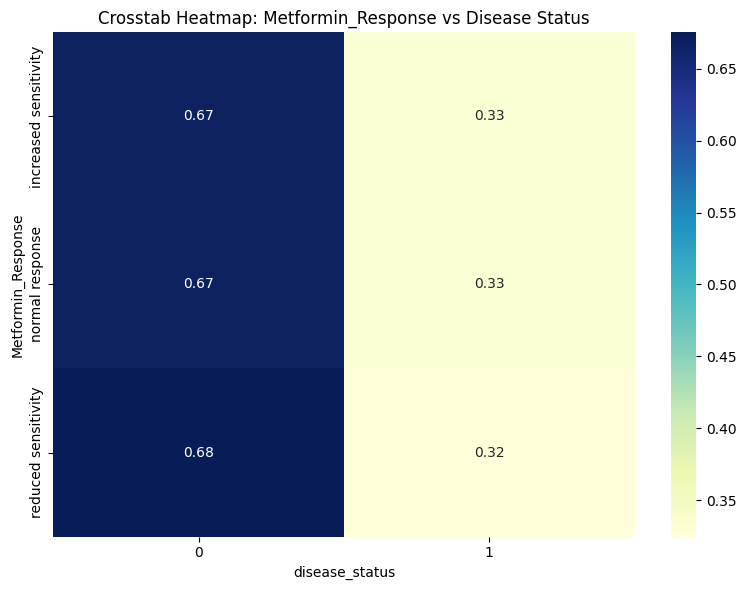

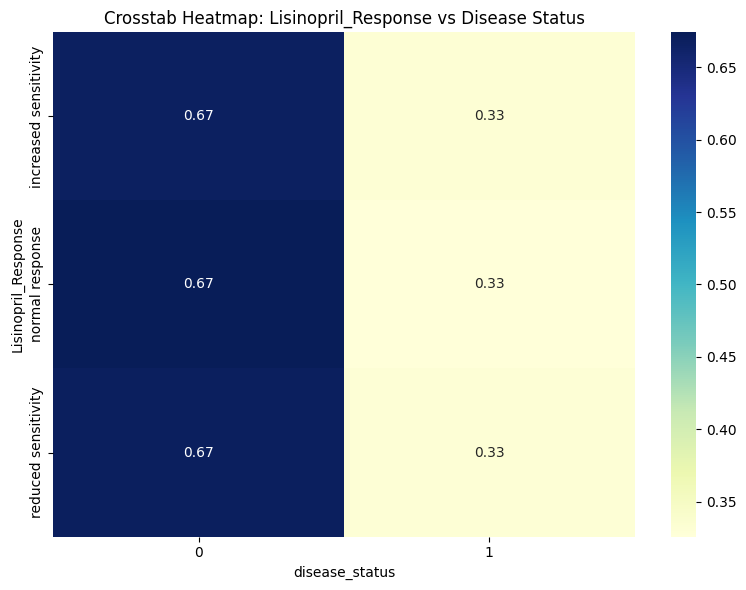

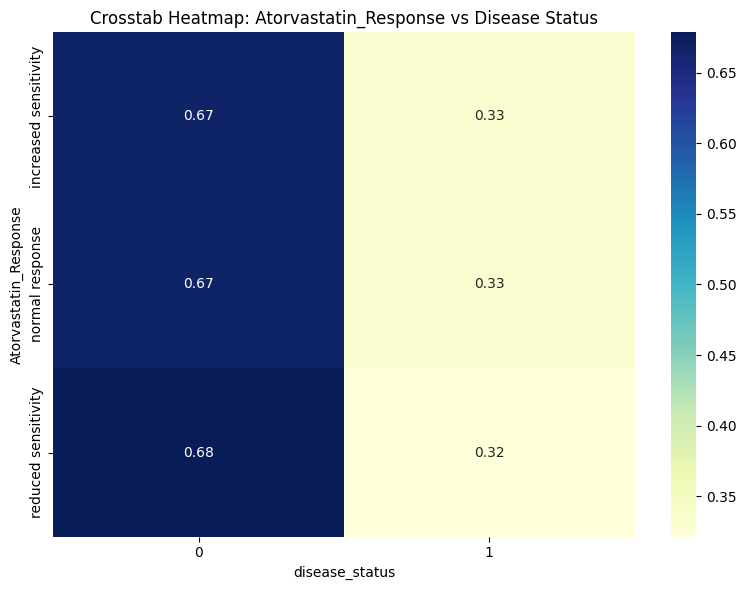

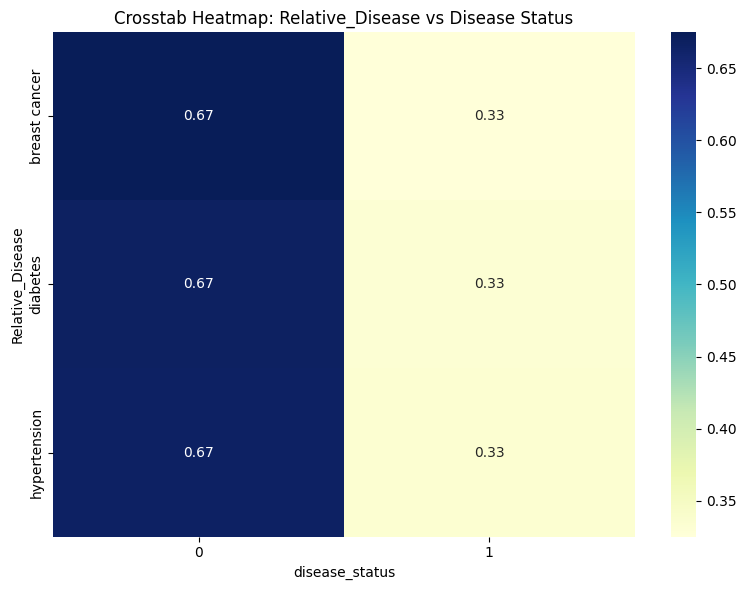

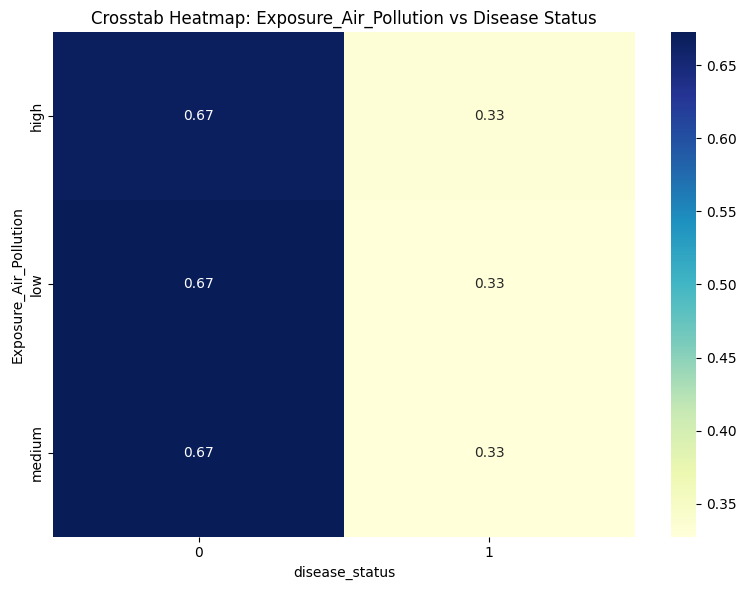

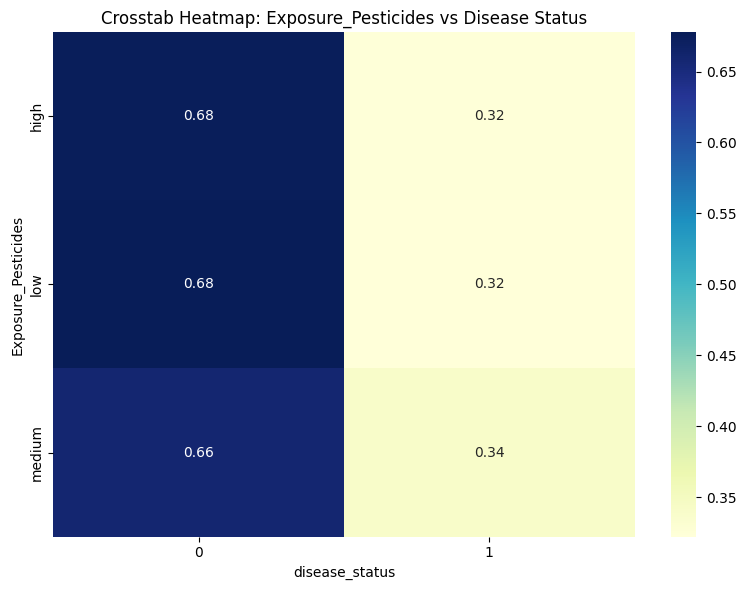

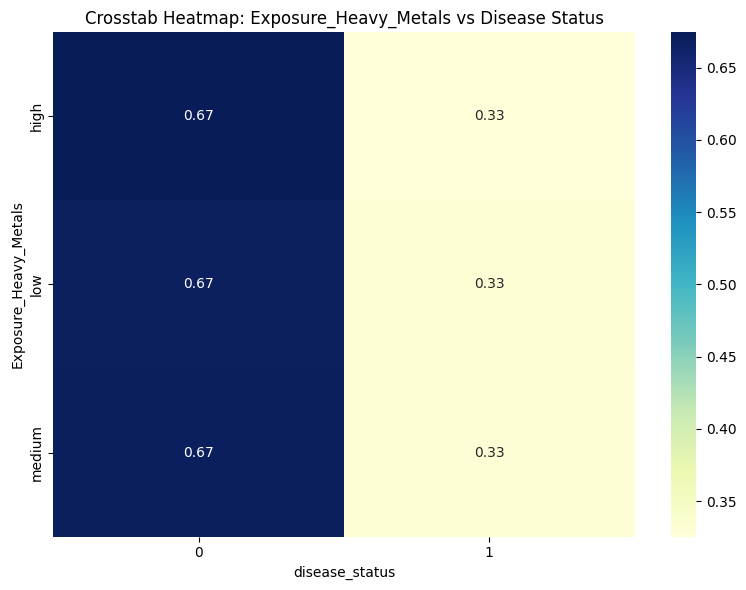

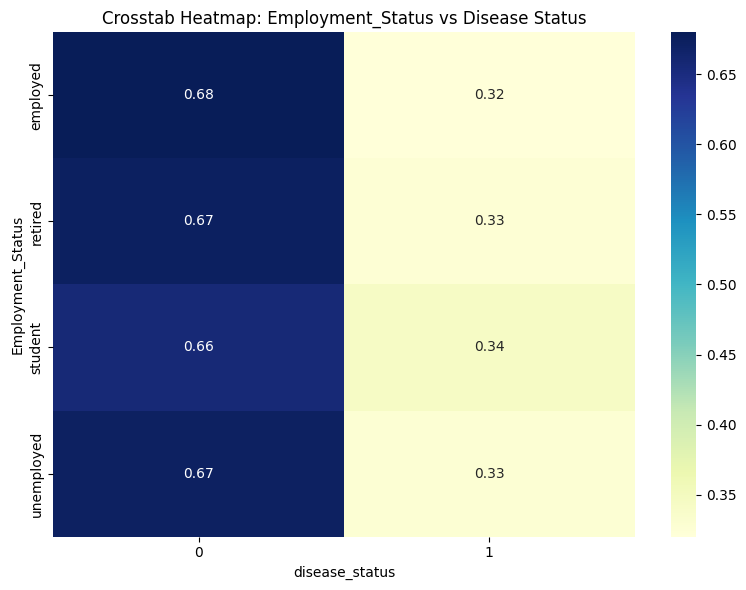

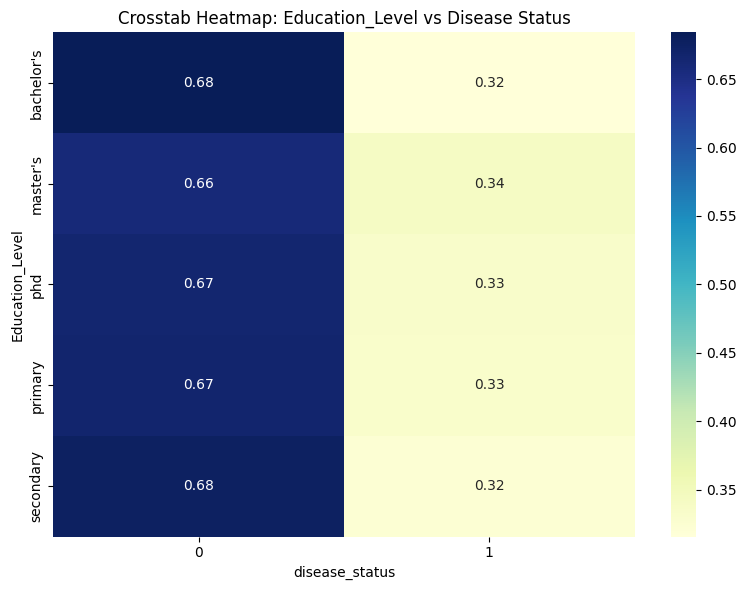

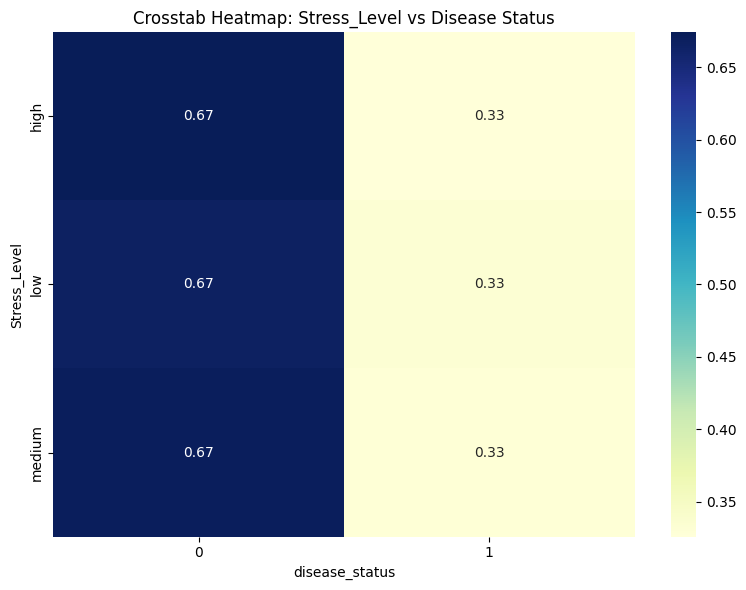

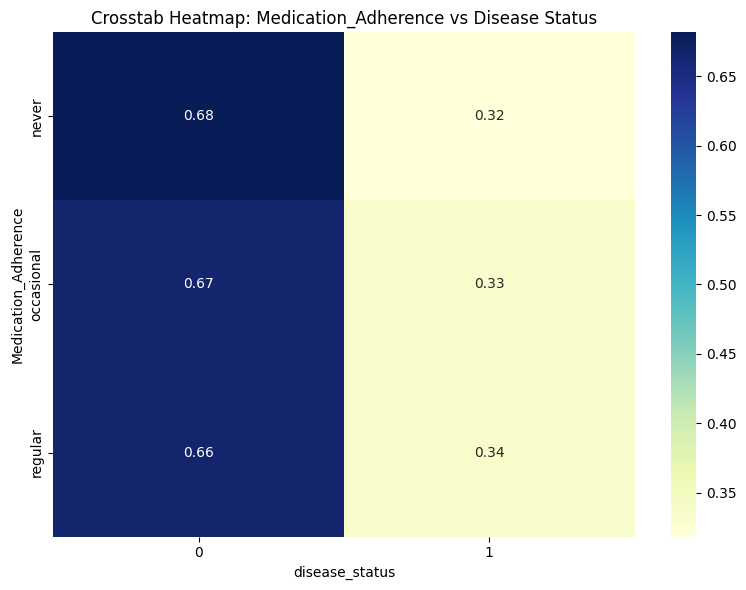

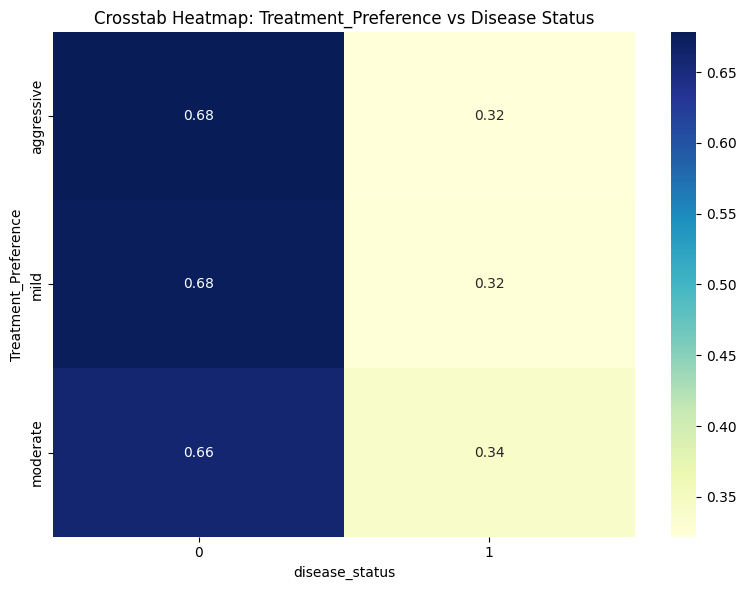

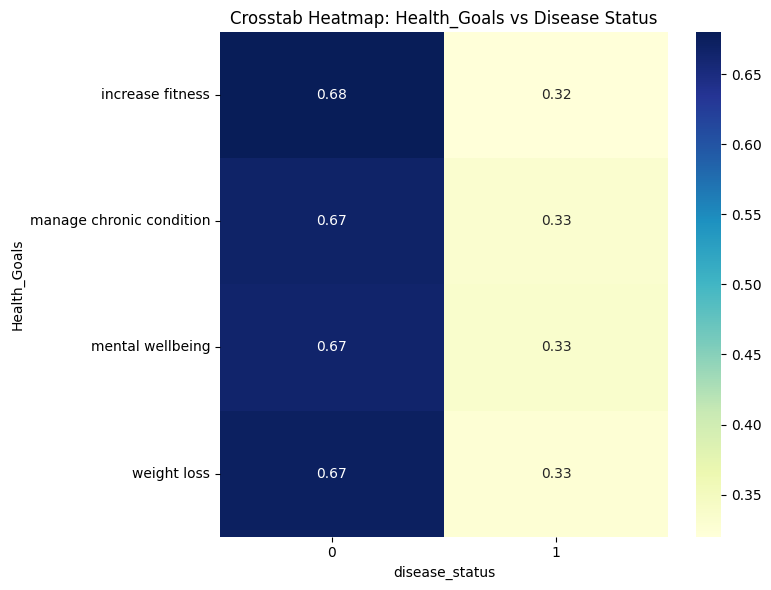

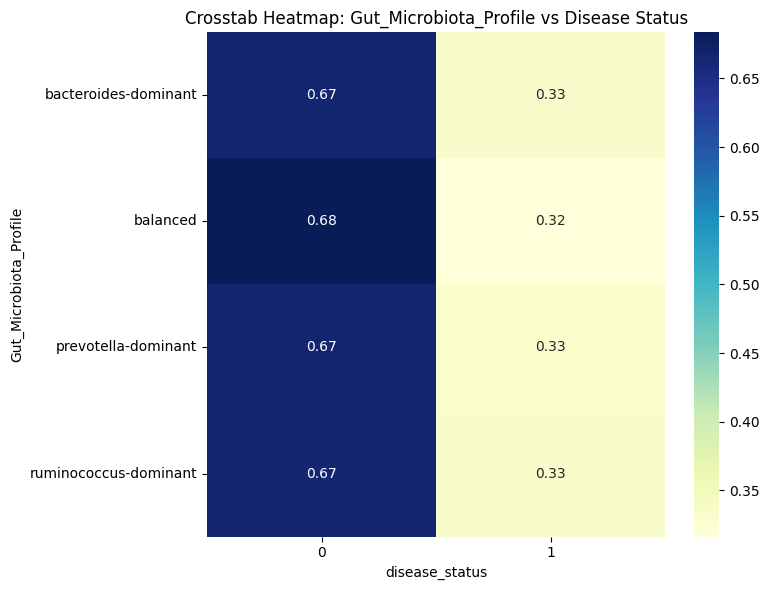

In [20]:
# Ensure the target variable 'disease_status' is present in the dataset
if 'disease_status' in df.columns:

    # Step 1: Boxplots for Numerical Features vs Target Variable
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(15, len(num_cols) * 3))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(len(num_cols), 2, i)
        sns.boxplot(x=df['disease_status'], y=df[col], data=df, palette="Set2")
        plt.title(f"{col} vs Disease Status")

    plt.tight_layout()
    plt.show()

    # Step 2: Count Plots for Categorical Features vs Target Variable
    excluded_cols = ['Medical_History', 'Current_Medications', 'Allergies']
    cat_cols = [col for col in df.select_dtypes(include=['category']).columns if col not in excluded_cols]

    plt.figure(figsize=(15, len(cat_cols) * 3))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(len(cat_cols), 2, i)
        sns.countplot(data=df, x=col, hue='disease_status', palette="coolwarm")
        plt.title(f"{col} vs Disease Status")

    plt.tight_layout()
    plt.show()

    # Step 3: Correlation Heatmap of Numerical Features with Target Variable
    plt.figure(figsize=(12, 6))
    corr_matrix = df[num_cols].corrwith(df['disease_status']).sort_values(ascending=False)
    sns.barplot(x=corr_matrix.index, y=corr_matrix.values, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title("Correlation of Numerical Features with Disease Status")
    plt.tight_layout()
    plt.show()

    # Step 4: Crosstab Heatmaps for Categorical Features vs Target Variable
    for cat in cat_cols:
        ctab = pd.crosstab(df[cat], df['disease_status'], normalize='index')
        plt.figure(figsize=(8, 6))
        sns.heatmap(ctab, annot=True, fmt=".2f", cmap="YlGnBu")
        plt.title(f"Crosstab Heatmap: {cat} vs Disease Status")
        plt.tight_layout()
        plt.show()

else:
    print("Target variable 'disease_status' not found in the dataset.")

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('disease_status ~ Average_Sleep * Stress_Level', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq      df         F    PR(>F)
Stress_Level                   0.086002     2.0  0.194905  0.822916
Average_Sleep                  0.305264     1.0  1.383631  0.239512
Average_Sleep:Stress_Level     3.410854     2.0  7.729983  0.000442
Residual                    2204.704807  9993.0       NaN       NaN


### Principal Component Analysis PCA

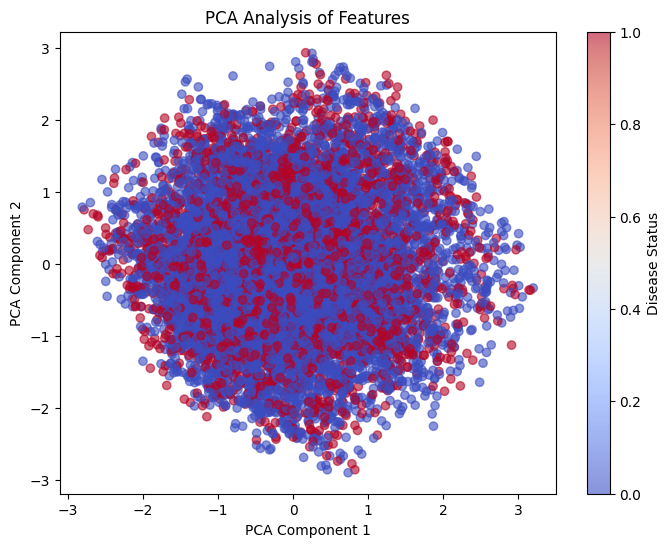

In [23]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ensure 'disease_status' exists and drop non-numeric features before PCA
if 'disease_status' in df.columns:
    # Selecting only numerical features for PCA
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    num_cols.remove('disease_status')  # Exclude the target variable

    # Standardize numerical features before PCA
    X_scaled = StandardScaler().fit_transform(df[num_cols])

    # Apply PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)

    # Plot PCA components with color representing disease_status
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['disease_status'], cmap="coolwarm", alpha=0.6)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("PCA Analysis of Features")
    plt.colorbar(label="Disease Status")
    plt.show()

else:
    print("Target variable 'disease_status' not found in the dataset.")


### Unsupervised Learning Methods

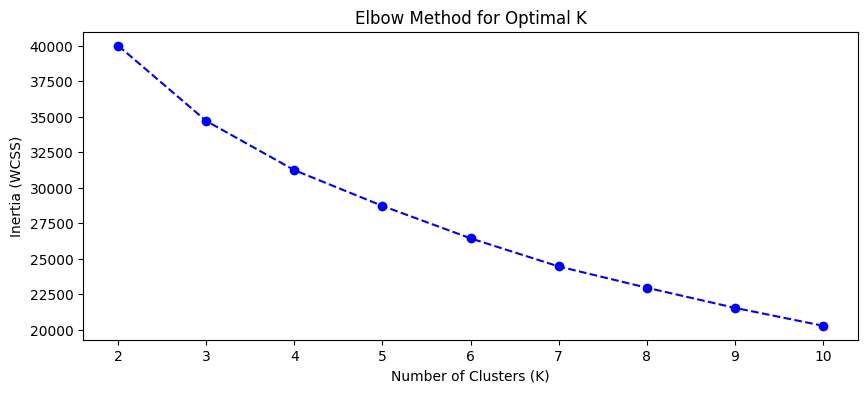

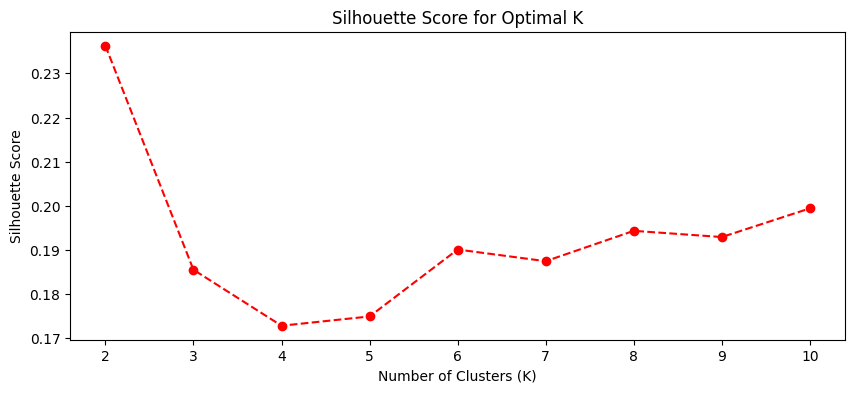

Optimal Number of Clusters: 2


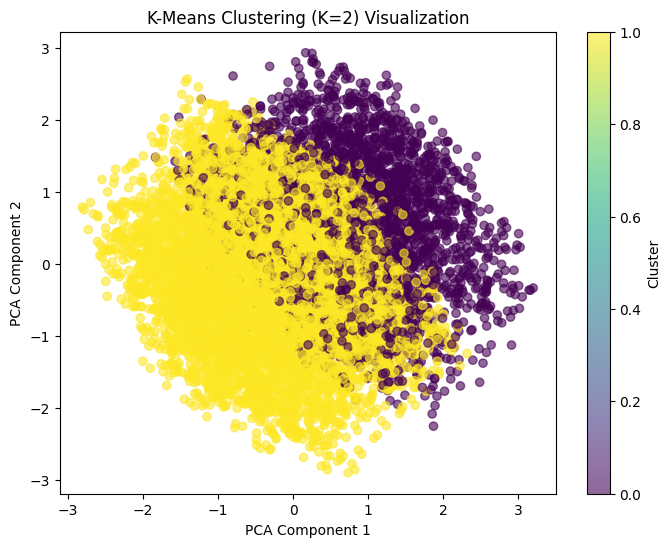

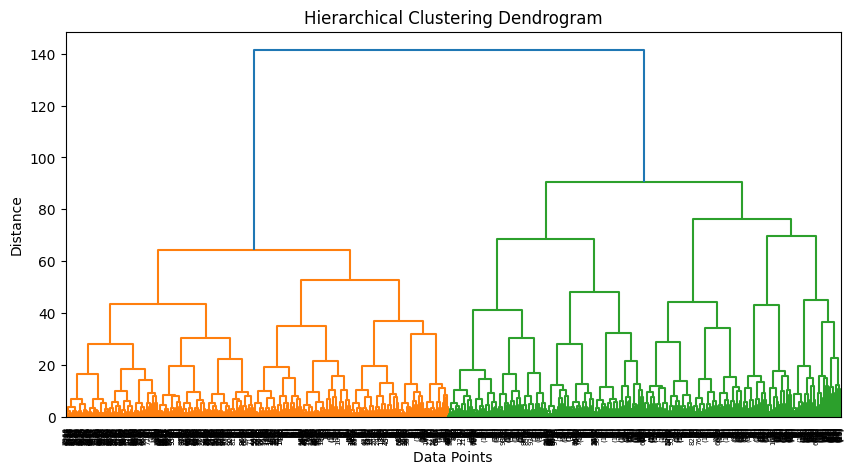

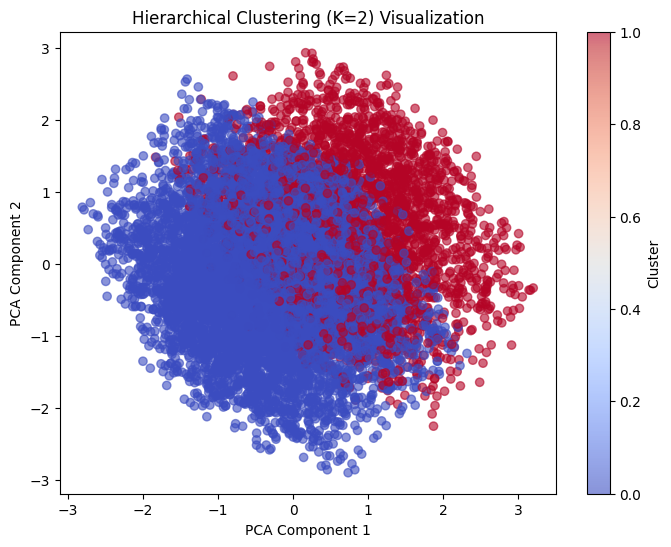


K-Means Cluster Distribution:
Cluster_KMeans
0    2982
1    7017
Name: count, dtype: int64

Hierarchical Cluster Distribution:
Cluster_Hierarchical
0    7017
1    2982
Name: count, dtype: int64


In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Ensure dataset is loaded
if 'df' in locals() or 'df' in globals():
    # Select only numerical features for clustering (excluding 'disease_status' if it exists)
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'disease_status' in num_cols:
        num_cols.remove('disease_status')  # Exclude target variable

    # Standardizing the data
    X_scaled = StandardScaler().fit_transform(df[num_cols])

    # Finding the Optimal K using the Elbow Method
    inertia = []
    silhouette_scores = []
    K_range = range(2, 11)  # Checking clusters from 2 to 10

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(10, 4))
    plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia (WCSS)")
    plt.title("Elbow Method for Optimal K")
    plt.show()

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 4))
    plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='r')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for Optimal K")
    plt.show()

    # Optimal K Selection (Based on Highest Silhouette Score)
    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"Optimal Number of Clusters: {optimal_k}")

    # Apply K-Means Clustering with Optimal K
    kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans_opt.fit_predict(X_scaled)

    # Add Cluster Labels to Data
    df['Cluster_KMeans'] = cluster_labels

    # PCA for Visualization
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_scaled)

    # Scatter Plot of PCA Components Colored by Cluster
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap="viridis", alpha=0.6)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(f"K-Means Clustering (K={optimal_k}) Visualization")
    plt.colorbar(scatter, label="Cluster")
    plt.show()

    # Hierarchical Clustering (Agglomerative)
    plt.figure(figsize=(10, 5))
    Z = linkage(X_scaled, method='ward')
    dendrogram(Z, truncate_mode="level", p=10)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

    # Apply Agglomerative Clustering with Optimal K
    agglomerative = AgglomerativeClustering(n_clusters=optimal_k)
    df['Cluster_Hierarchical'] = agglomerative.fit_predict(X_scaled)

    # Scatter Plot for Hierarchical Clustering
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster_Hierarchical'], cmap="coolwarm", alpha=0.6)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(f"Hierarchical Clustering (K={optimal_k}) Visualization")
    plt.colorbar(scatter, label="Cluster")
    plt.show()

    # Display Cluster Counts
    cluster_counts = df['Cluster_KMeans'].value_counts().sort_index()
    print(f"\nK-Means Cluster Distribution:\n{cluster_counts}")

    cluster_counts_hierarchical = df['Cluster_Hierarchical'].value_counts().sort_index()
    print(f"\nHierarchical Cluster Distribution:\n{cluster_counts_hierarchical}")

else:
    print("Dataset not found. Please re-upload and reload your dataset.")

<ipython-input-25-61c2e12f04ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="disease_status", palette="coolwarm")


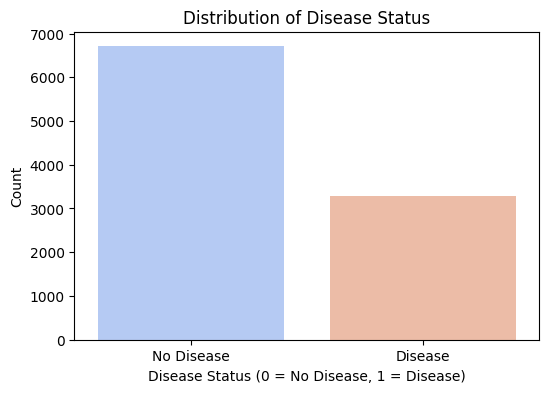

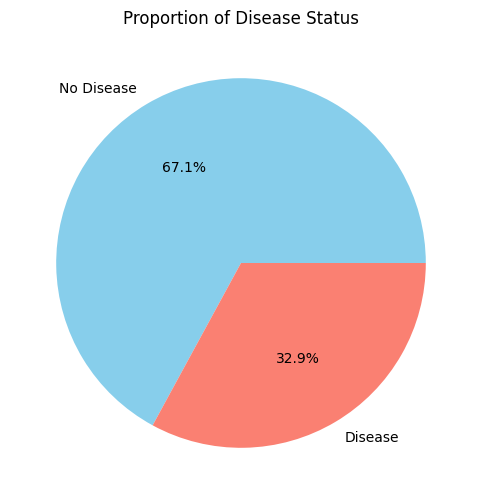

disease_status
0    6706
1    3293
Name: count, dtype: int64

In [25]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Bar Chart of Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="disease_status", palette="coolwarm")
plt.title("Distribution of Disease Status")
plt.xlabel("Disease Status (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Disease", "Disease"])
plt.show()

# Plot Pie Chart of Target Variable Distribution
plt.figure(figsize=(6, 6))
df["disease_status"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "salmon"], labels=["No Disease", "Disease"])
plt.title("Proportion of Disease Status")
plt.ylabel("")  # Hide y-label
plt.show()

# Display count values
df["disease_status"].value_counts()

### Supervised Learning Models

In [27]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [28]:
# Import additional required libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

Training Logistic Regression...
Training Support Vector Machine...
Training Decision Tree...
Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:51:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2634, number of negative: 5365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1698
[LightGBM] [Info] Number of data points in the train set: 7999, number of used features: 360
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329291 -> initscore=-0.711393
[LightGBM] [Info] Start training from score -0.711393


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training CatBoost...
Training Neural Network (MLP)...


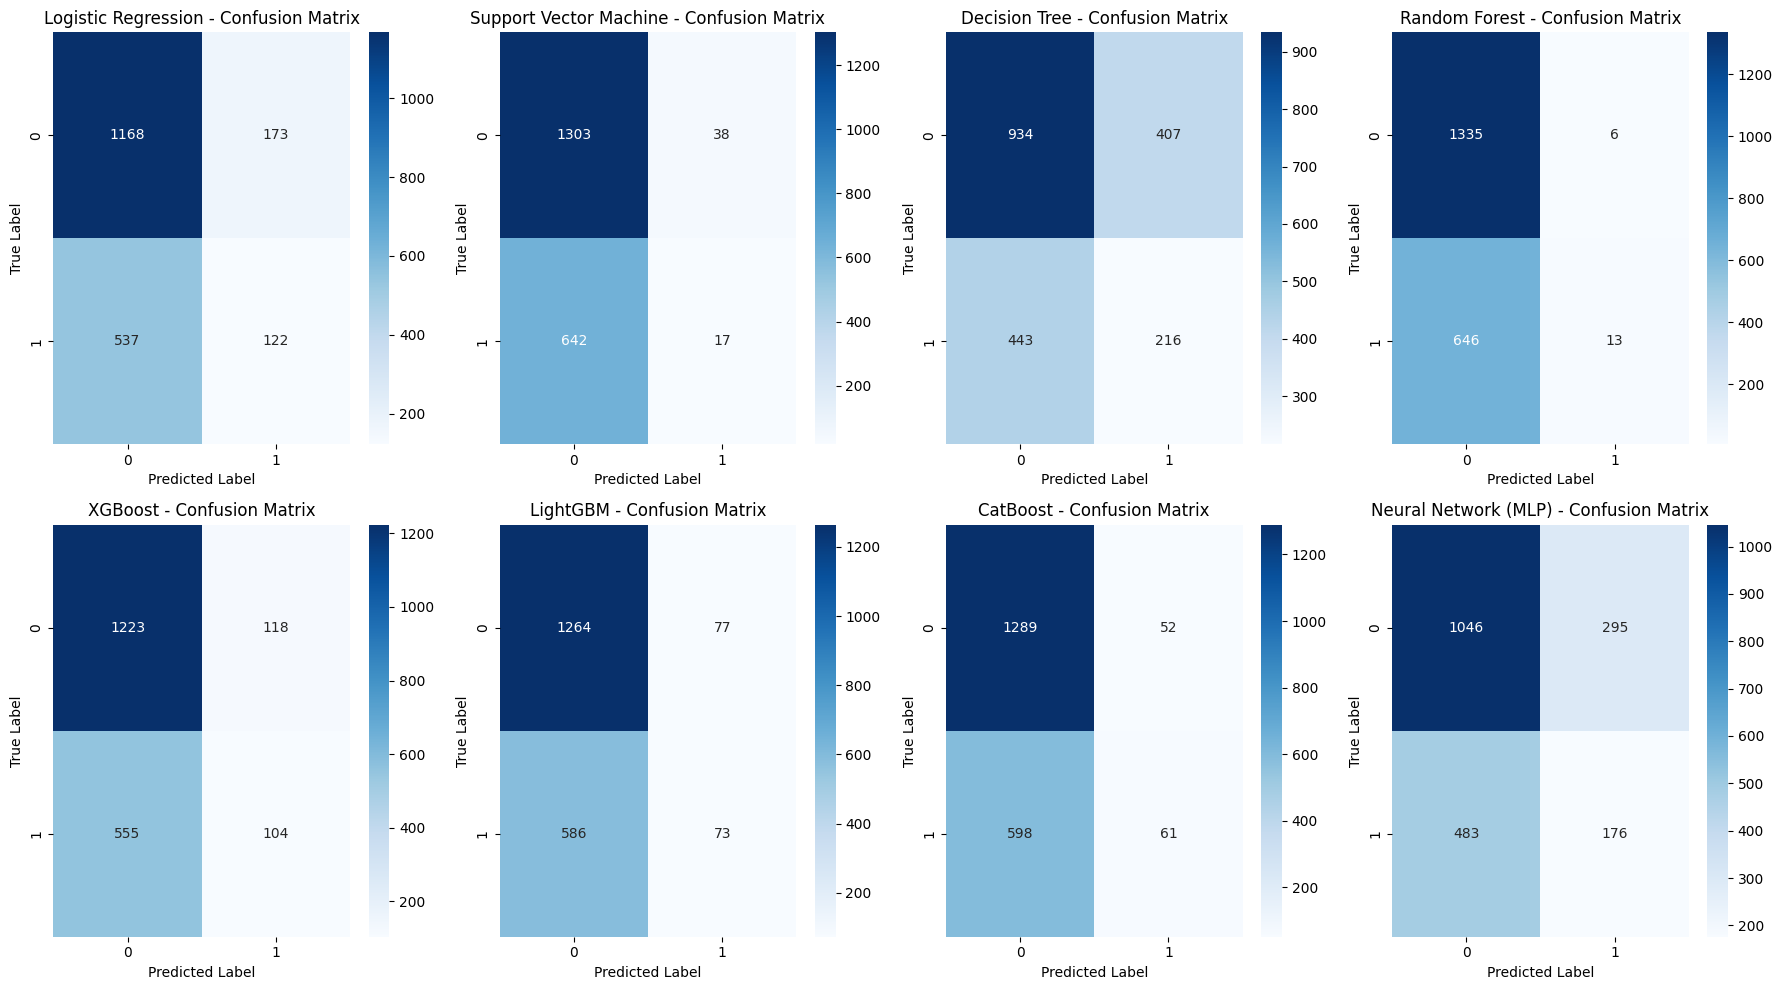

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


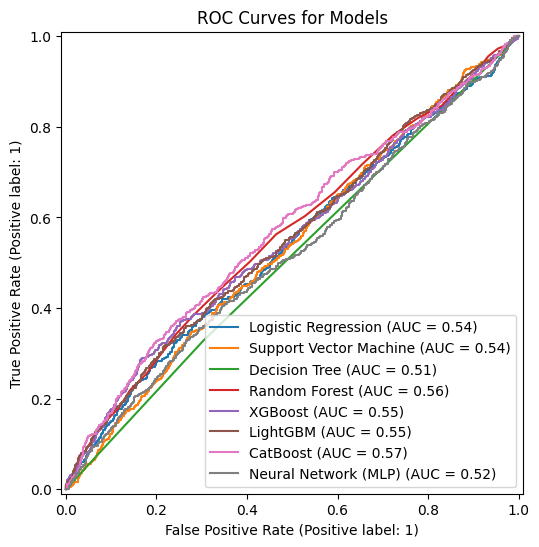

<ipython-input-34-97604d448399>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df[:10], x="Importance", y="Feature", palette="viridis")


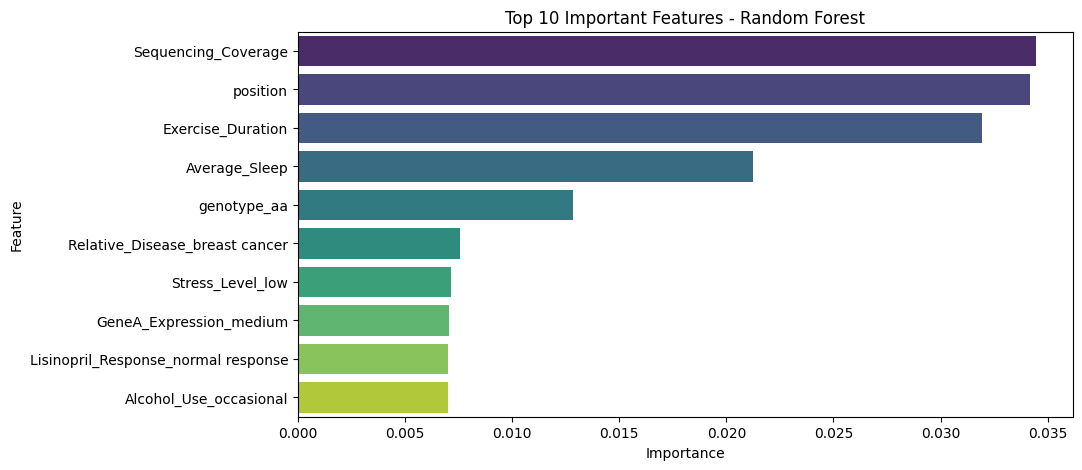

<ipython-input-34-97604d448399>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df[:10], x="Importance", y="Feature", palette="viridis")


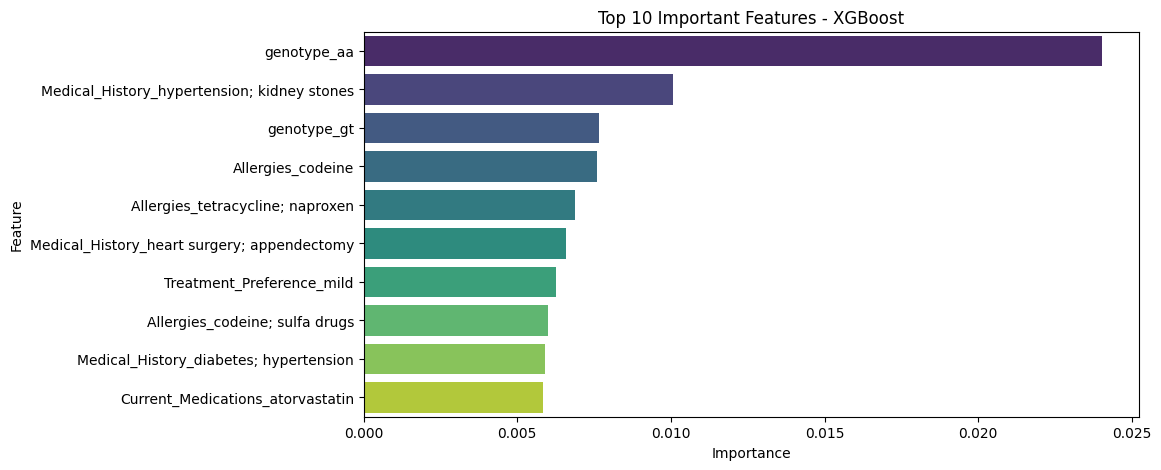

<ipython-input-34-97604d448399>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df[:10], x="Importance", y="Feature", palette="viridis")


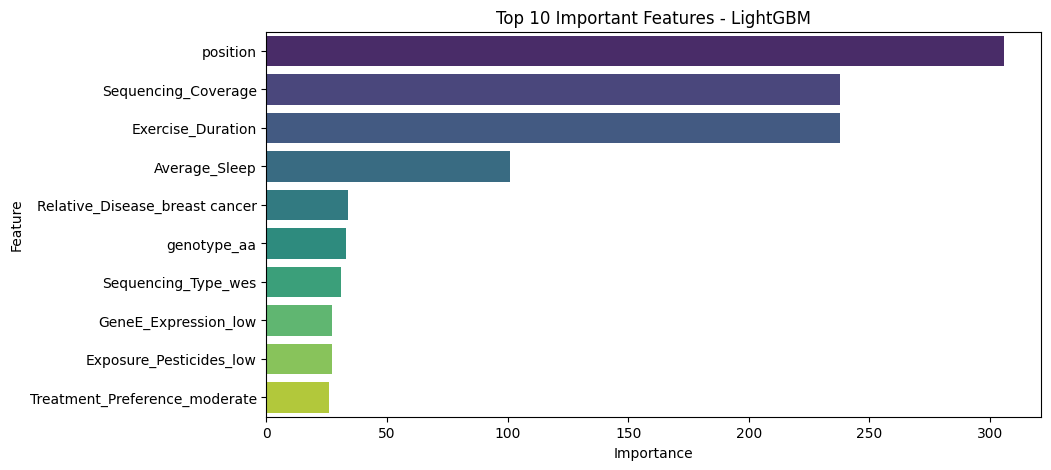

<ipython-input-34-97604d448399>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df[:10], x="Importance", y="Feature", palette="viridis")


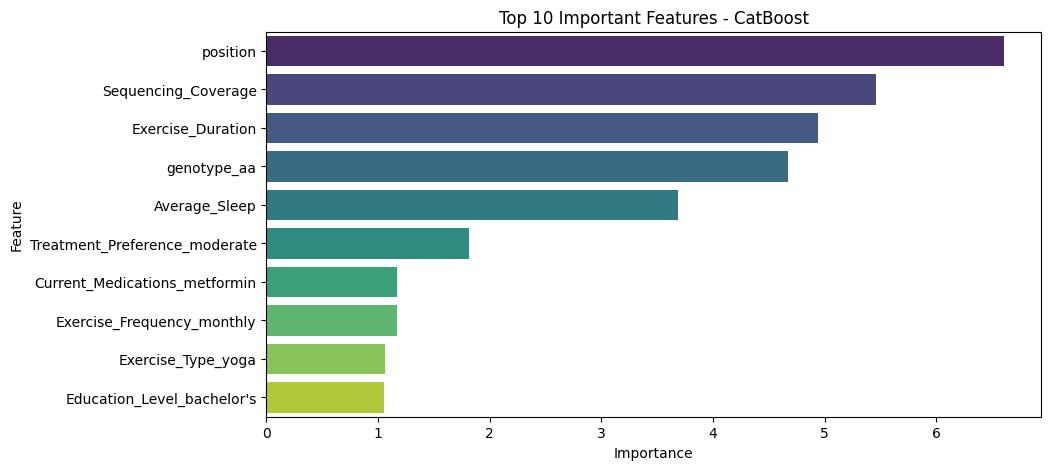

{'Logistic Regression': {'Accuracy': 0.645,
  'Precision': 0.4135593220338983,
  'Recall': 0.18512898330804248,
  'F1-Score': 0.2557651991614256,
  'ROC-AUC': 0.5401603903503263,
  'Confusion Matrix': array([[1168,  173],
         [ 537,  122]]),
  'Classification Report': {'0': {'precision': 0.6850439882697947,
    'recall': 0.8709917971662938,
    'f1-score': 0.7669074195666448,
    'support': 1341.0},
   '1': {'precision': 0.4135593220338983,
    'recall': 0.18512898330804248,
    'f1-score': 0.2557651991614256,
    'support': 659.0},
   'accuracy': 0.645,
   'macro avg': {'precision': 0.5493016551518465,
    'recall': 0.5280603902371681,
    'f1-score': 0.5113363093640352,
    'support': 2000.0},
   'weighted avg': {'precision': 0.5955897907450668,
    'recall': 0.645,
    'f1-score': 0.5984860579431251,
    'support': 2000.0}}},
 'Support Vector Machine': {'Accuracy': 0.66,
  'Precision': 0.3090909090909091,
  'Recall': 0.025796661608497723,
  'F1-Score': 0.047619047619047616,
  '

In [34]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

# Step 1: Data Preprocessing
# Selecting features and target
X = df.drop(columns=['disease_status', '# rsid'], errors='ignore')  # Excluding target and identifier column
y = df['disease_status']

# Encode categorical variables (Using One-Hot Encoding for better performance on tree-based models)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Apply One-Hot Encoding to categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = ohe.fit_transform(X[categorical_columns])
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(categorical_columns))

# Combine encoded categorical features with numerical features
X_final = pd.concat([X[numerical_columns].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Standardize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Step 2: Train-Test Split (80-20 Stratified Sampling)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Initialize Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Step 4: Train & Evaluate Models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train Model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Step 5: Visualizing Results

# Plot Confusion Matrices
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()
for i, (model_name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=model_name, ax=plt.gca())

plt.title("ROC Curves for Models")
plt.show()

# Step 6: Feature Importance (For Tree-Based Models)
tree_models = ["Random Forest", "XGBoost", "LightGBM", "CatBoost"]
for model_name in tree_models:
    if model_name in results:
        feature_importance = models[model_name].feature_importances_
        importance_df = pd.DataFrame({"Feature": X_final.columns, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

        # Plot Feature Importance
        plt.figure(figsize=(10, 5))
        sns.barplot(data=importance_df[:10], x="Importance", y="Feature", palette="viridis")
        plt.title(f"Top 10 Important Features - {model_name}")
        plt.show()

# Step 7: Displaying Model Performance Metrics
results


In [35]:
import pandas as pd

# Creating a dictionary with model performance metrics
model_results = {
    'Logistic Regression': {'Accuracy': 0.645, 'Precision': 0.4136, 'Recall': 0.1851, 'F1-Score': 0.2558, 'ROC-AUC': 0.5402},
    'Support Vector Machine': {'Accuracy': 0.660, 'Precision': 0.3091, 'Recall': 0.0258, 'F1-Score': 0.0476, 'ROC-AUC': 0.5366},
    'Decision Tree': {'Accuracy': 0.575, 'Precision': 0.3467, 'Recall': 0.3278, 'F1-Score': 0.3370, 'ROC-AUC': 0.5121},
    'Random Forest': {'Accuracy': 0.674, 'Precision': 0.6842, 'Recall': 0.0197, 'F1-Score': 0.0383, 'ROC-AUC': 0.5624},
    'XGBoost': {'Accuracy': 0.6635, 'Precision': 0.4685, 'Recall': 0.1578, 'F1-Score': 0.2361, 'ROC-AUC': 0.5527},
    'LightGBM': {'Accuracy': 0.6685, 'Precision': 0.4867, 'Recall': 0.1108, 'F1-Score': 0.1805, 'ROC-AUC': 0.5532},
    'CatBoost': {'Accuracy': 0.675, 'Precision': 0.5398, 'Recall': 0.0926, 'F1-Score': 0.1580, 'ROC-AUC': 0.5736},
    'Neural Network (MLP)': {'Accuracy': 0.611, 'Precision': 0.3737, 'Recall': 0.2671, 'F1-Score': 0.3115, 'ROC-AUC': 0.5210},
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame.from_dict(model_results, orient='index')

# Display the table
print("Model Performance Metrics")
print(results_df)

Model Performance Metrics
                        Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression       0.6450     0.4136  0.1851    0.2558   0.5402
Support Vector Machine    0.6600     0.3091  0.0258    0.0476   0.5366
Decision Tree             0.5750     0.3467  0.3278    0.3370   0.5121
Random Forest             0.6740     0.6842  0.0197    0.0383   0.5624
XGBoost                   0.6635     0.4685  0.1578    0.2361   0.5527
LightGBM                  0.6685     0.4867  0.1108    0.1805   0.5532
CatBoost                  0.6750     0.5398  0.0926    0.1580   0.5736
Neural Network (MLP)      0.6110     0.3737  0.2671    0.3115   0.5210


In [38]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d4fbfa3ddca784ad4ebcab74222a121c36e1a599b6aebc81d8c1eacc5fbe6f8d
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Two-Way ANOVA Results:
                                       sum_sq      df         F    PR(>F)
Genetic_Factor                      0.017330     1.0  0.078448  0.779441
Microbiota_Factor                   0.733190     1.0  3.318939  0.068636
Genetic_Factor:Microbiota_Factor    0.163770     1.0  0.741338  0.389336
Residual                          440.938471  1996.0       NaN       NaN


<Figure size 800x600 with 0 Axes>

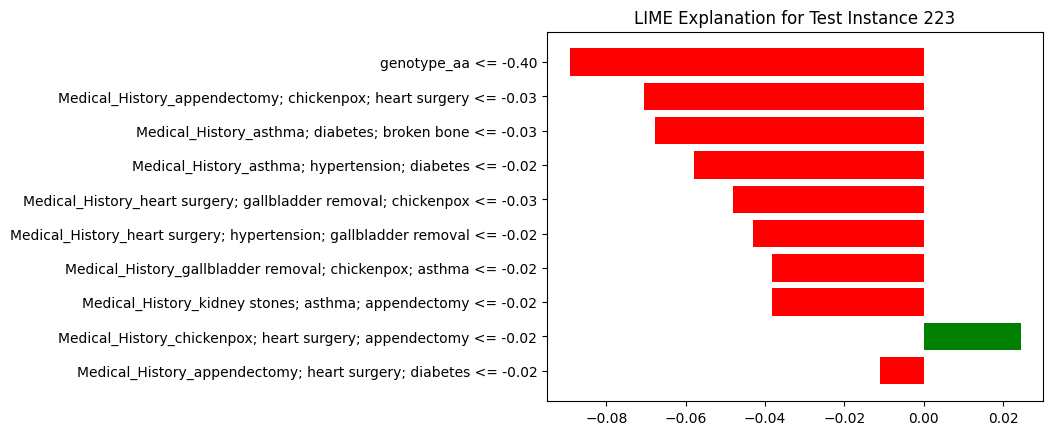

In [39]:
# Import necessary libraries for interaction analysis and model explainability
import statsmodels.api as sm
from statsmodels.formula.api import ols
import lime
import lime.lime_tabular

# Step 1: Two-Way ANOVA for Interaction Analysis
# Select a subset of genetic and microbiota features for interaction analysis
genetic_features = [col for col in X_final.columns if "Gene" in col]
microbiota_features = [col for col in X_final.columns if "Gut_Microbiota_Profile" in col]

# Choosing one genetic feature and one microbiota feature for Two-Way ANOVA
selected_genetic_feature = genetic_features[0] if genetic_features else None
selected_microbiota_feature = microbiota_features[0] if microbiota_features else None

if selected_genetic_feature and selected_microbiota_feature:
    # Prepare the data for ANOVA
    anova_df = pd.DataFrame({
        "Disease_Status": y_test.values,
        "Genetic_Factor": X_test[:, X_final.columns.get_loc(selected_genetic_feature)],
        "Microbiota_Factor": X_test[:, X_final.columns.get_loc(selected_microbiota_feature)]
    })

    # Fit Two-Way ANOVA Model
    model = ols('Disease_Status ~ Genetic_Factor * Microbiota_Factor', data=anova_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("Two-Way ANOVA Results:\n", anova_table)

else:
    print("Genetic or microbiota features not found for Two-Way ANOVA analysis.")

# Step 2: LIME Model Explainability
# Select a trained model for explanation (e.g., Random Forest)
lime_model = models["Random Forest"]

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X_final.columns,
    class_names=["No Disease", "Disease"],
    mode="classification"
)

# Choose a random instance from the test set for explanation
instance_idx = np.random.randint(0, len(X_test))
instance = X_test[instance_idx].reshape(1, -1)

# Generate LIME explanation
lime_exp = explainer.explain_instance(instance[0], lime_model.predict_proba, num_features=10)

# Show LIME explanation
plt.figure(figsize=(8, 6))
lime_exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Test Instance {instance_idx}")
plt.show()

# Display textual explanation
lime_exp.show_in_notebook()